
<h1 class="notebook-title"> Using Packet Rate Data to Detect Ongoing DoS Attacks </h1>

In this notebook, we look to examine data on packets collected from vSocial, a Virtual Reality Learning Environment, during periods of normal activity along with samples collected during simulated DoS attacks (packet duplication, tampering, and dropping attacks). We first organize and restructure the data to get necessary statistics such as total packets sent over time and changes in packet speed over time, and we plot these measurements to compare discrepencies between each of the behaviors (normal vs. various DoS attacks). The final goal is to develop a detection algorithm that accurately classifies whether the current packet data implies normal behavior or the ongoing activities of one of the attacks. We use time series feature extraction to discover quantitative parameters from samples of packet speed over a period of time, and then are able to train various supervised machine learning models to attempt to classify a given situation. A variety of models are tested and compared for accuracy, and the most successful models for us were found to be implementations of K Nearest Neighbors, Random Forests, and a Voting Classifier combining the use of both.

<div class="outline">

----------------------------- Notebook Outline -----------------------------

<ul> 
    <br>

    <li>
        <a href="#Libraries">Libraries</a>
    </li>
    
    <br>
    
    <li>
        <a href="#Data">Data</a>
        <ul>
          <li><a href="#Data-a">A. Normal Behavior</a></li>
          <li><a href="#Data-b">B. Duplication Attack</a></li>
          <li><a href="#Data-c">C. Tampering Attack</a></li>
          <li><a href="#Data-d">D. Dropping Attack</a></li>
        </ul>
    </li>

    <br>
    
    <li>
        <a href="#Visualizations">Visualizations</a>
        <ul>
          <li>
              <a href="#Visualizations-a">A. Total Packets Sent Over Time</a>
              <ul>
                  <li><a href="#Visualizations-a-i">i. Normal Behavior</a></li>
                  <li><a href="#Visualizations-a-ii">ii. Duplication Attack</a></li>
                  <li><a href="#Visualizations-a-iii">iii. Tampering Attack</a></li>
                  <li><a href="#Visualizations-a-iv">iv. Dropping Attack</a></li>
              </ul>
          </li>
          <br>
          <li>
              <a href="#Visualizations-b">B. Packet Rate Changes Over Time</a>
              <ul>
                  <li><a href="#Visualizations-b-i">i. Normal Behavior</a></li>
                  <li><a href="#Visualizations-b-ii">ii. Duplication Attack</a></li>
                  <li><a href="#Visualizations-b-iii">iii. Tampering Attack</a></li>
                  <li><a href="#Visualizations-b-iv">iv. Dropping Attack</a></li>
              </ul>
          </li>
          <br>
          <li><a href="#Visualizations-c">C. Interactive Plot</a></li>
        </ul>
    </li>
    
    <br>
    
    <li>
        <a href="#Classifiers">Classifiers</a>
        <ul>
          <li>
              <a href="#Classifiers-a">A. Feature Extraction</a>
              <ul>
                  <li><a href="#Classifiers-a-i">i. tsfresh</a></li>
              </ul>
          </li>
          <br>
          <li>
              <a href="#Classifiers-b">B. Feature Filtering</a>
              <ul>
                  <li><a href="#Classifiers-b-i">i. tsfresh</a></li>
                  <li><a href="#Classifiers-b-ii">ii. Select K Best</a></li>
                  <li><a href="#Classifiers-b-iii">iii. Principal Component Analysis</a></li>
              </ul>
          </li>
          <br>
          <li>
              <a href="#Classifiers-c">C. Machine Learning Models</a>
              <ul>
                  <li><a href="#Classifiers-c-i">i. Decision Tree</a></li>
                  <li><a href="#Classifiers-c-ii">ii. Multilayer Perceptron (Neural Network)</a></li>
                  <li><a href="#Classifiers-c-iii">iii. SVC</a></li>
                  <li><a href="#Classifiers-c-iv">iv. Logistic Regression</a></li>
                  <li><a href="#Classifiers-c-v">v. K Nearest Neighbors</a></li>
                  <li><a href="#Classifiers-c-vi">vi. Random Forests</a></li>
                  <li><a href="#Classifiers-c-vii">v. K Nearest Neighbors + Random Forests Voting</a></li>                  
              </ul>
          </li>
        </ul>
    </li>
   
    <li>
        <a href="#Results">Results</a>
        <ul>
          <li>
              <a href="#Results-a">A. Decision Tree</a>
          </li>
          <li>
              <a href="#Results-b">B. K Nearest Neighbors</a>
          </li>
          <li>
              <a href="#Results-c">C. Random Forests</a>
          </li>
          <li>
              <a href="#Results-d">D. K Nearest Neighbors + Random Forests Voting</a>
          </li>
        </ul>
    </li>
    
    <br>
    
    <li>
        <a href="#Classifiers-Multilabel">Classifiers (Multilabel)</a>
        <ul>
          <li>
              <a href="#Classifiers-Multilabel-a">A. Feature Extraction</a>
              <ul>
                  <li><a href="#Classifiers-Multilabel-a-i">i. tsfresh</a></li>
              </ul>
          </li>
          <br>
          <li>
              <a href="#Classifiers-Multilabel-b">B. Feature Filtering</a>
              <ul>
                  <li><a href="#Classifiers-Multilabel-b-i">i. tsfresh</a></li>
              </ul>
          </li>
          <br>
          <li>
              <a href="#Classifiers-Multilabel-c">C. Machine Learning Models</a>
              <ul>
                  <li><a href="#Classifiers-Multilabel-c-i">i. Classifier Chain</a></li>
                  <li><a href="#Classifiers-Multilabel-c-ii">ii. Label Powerset</a></li>
                  <li><a href="#Classifiers-Multilabel-c-iii">iii. Multilabel K Nearest Neighbor</a></li>          
              </ul>
          </li>
          <br>
        </ul>
    </li>
    
    <li>
        <a href="#Results-Multilabel">Results (Multilabel)</a>
        <ul>
          <li>
              <a href="#Results-Multilabel-a">A. Multilabel K Nearest Neighbors</a>
          </li>
        </ul>
    </li>


</ul>

</div>

<h1 class="section-header"><a id="Libraries"></a>Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time as time

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, plot
init_notebook_mode(connected=True)

import random
import copy

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import confusion_matrix
from statistics import mean
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

<h1 class="section-header"><a id="Data"></a>Data</h1>

<h1><a id="Data-a"></a>A. Normal Behavior</h1>

In [2]:
df_norm = pd.read_csv("vSocial_Norm_10mins.csv")
df_norm.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.147,128.206.20.43,UDP,83,64513 > 50495 Len=41
1,2,0.000022,128.206.20.147,128.206.20.43,QUIC,83,Protected Payload (KP0)
2,3,0.000035,128.206.20.147,128.206.20.43,UDP,83,64513 > 50497 Len=41
3,4,0.000048,128.206.20.147,128.206.20.43,UDP,83,64513 > 50496 Len=41
4,5,0.000061,128.206.20.147,128.206.20.43,UDP,83,64513 > 50500 Len=41


<h1><a id="Data-b"></a>B. Duplication Attack</h1>

In [3]:
df_dup = pd.read_csv("vSocial_Dup_10mins.csv")
df_dup.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.147,128.206.20.43,UDP,132,64513 > 50494 Len=90
1,2,0.000210,128.206.20.147,128.206.20.43,UDP,132,64513 > 50494 Len=90
2,3,0.000577,128.206.20.147,128.206.20.43,UDP,132,64513 > 50494 Len=90
3,4,0.000921,128.206.20.147,128.206.20.43,UDP,132,64513 > 50494 Len=90
4,5,0.001063,128.206.20.147,128.206.20.43,UDP,132,64513 > 50494 Len=90


<h1><a id="Data-c"></a>C. Tampering Attack</h1>

In [4]:
df_tamper = pd.read_csv("vSocial_Tamper_10mins.csv")
df_tamper.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.43,128.206.20.147,UDP,168,50496 > 64513 Len=126
1,2,0.000567,128.206.20.147,128.206.20.43,UDP,132,64513 > 62430 Len=90
2,3,0.004150,128.206.20.43,128.206.20.147,UDP,82,62430 > 64513 Len=40
3,4,0.004866,128.206.20.147,128.206.20.43,UDP,610,64513 > 50496 Len=568
4,5,0.010442,128.206.20.147,128.206.20.43,UDP,132,64513 > 62430 Len=90


<h1><a id="Data-d"></a>D. Dropping Attack</h1>

In [5]:
df_drop = pd.read_csv("vSocial_Drop_10mins.csv")
df_drop.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.43,128.206.20.147,UDP,82,57490 > 64513 Len=40
1,2,0.008214,128.206.20.43,128.206.20.147,UDP,709,50499 > 64513 Len=667
2,3,0.010326,128.206.20.43,128.206.20.147,UDP,82,57490 > 64513 Len=40
3,4,0.023819,128.206.20.43,128.206.20.147,UDP,82,57490 > 64513 Len=40
4,5,0.030320,128.206.20.43,128.206.20.147,UDP,82,57490 > 64513 Len=40


<h1><a id="Data-e"></a>E. Duplication + Dropping Attack</h1>

In [6]:
df_dup_drop = pd.read_csv("vSocial_Dup_Drop_10mins.csv")
df_dup_drop.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.43,UDP,614,58222 > 62057 Len=572
1,2,0.007095,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40
2,3,0.012939,128.206.20.43,128.206.20.46,UDP,143,62057 > 58222 Len=101
3,4,0.016943,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40
4,5,0.026106,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40


<h1><a id="Data-f"></a>F. Duplication + Tampering Attack</h1>

In [7]:
df_dup_tamper = pd.read_csv("vSocial_Dup_Tamper_10mins.csv")
df_dup_tamper.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.43,UDP,626,58222 > 53290 Len=584
1,2,0.000713,128.206.20.46,128.206.20.43,UDP,626,58222 > 53290 Len=584
2,3,0.001075,128.206.20.43,128.206.20.46,UDP,198,53291 > 58222 Len=156
3,4,0.001075,128.206.20.43,128.206.20.46,UDP,198,53291 > 58222 Len=156
4,5,0.001196,128.206.20.46,128.206.20.43,UDP,626,58222 > 53290 Len=584


<h1><a id="Data-g"></a>G. Dropping + Tampering Attack</h1>

In [8]:
df_drop_tamper = pd.read_csv("vSocial_Drop_Tamper_10mins.csv")
df_drop_tamper.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40
1,2,0.002915,128.206.20.46,128.206.20.43,UDP,132,58222 > 62053 Len=90
2,3,0.011434,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40
3,4,0.019637,128.206.20.43,128.206.20.46,UDP,143,62057 > 58222 Len=101
4,5,0.019637,128.206.20.43,128.206.20.46,UDP,82,62053 > 58222 Len=40


<h1><a id="Data-h"></a>H. Dropping + Duplication + Tampering Attack</h1>

In [9]:
df_drop_dup_tamper = pd.read_csv("vSocial_Drop_Dup_Tamper_10mins.csv")
df_drop_dup_tamper.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.43,128.206.20.46,UDP,82,54179 > 54854 Len=40
1,2,0.009997,128.206.20.43,128.206.20.46,UDP,82,54179 > 54854 Len=40
2,3,0.012511,128.206.20.43,128.206.20.46,UDP,143,63271 > 54854 Len=101
3,4,0.019995,128.206.20.43,128.206.20.46,UDP,82,54179 > 54854 Len=40
4,5,0.029499,128.206.20.43,128.206.20.46,UDP,82,54179 > 54854 Len=40


<h1><a id="Data-i"></a>I. Normal to Dropping Transition</h1>

In [11]:
df_drop_transition = pd.read_csv("vSocial_Drop_Transition_5mins.csv")
df_drop_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.43,128.206.20.46,UDP,143,61621 > 62141 Len=101
1,2,0.002939,128.206.20.46,128.206.20.43,UDP,132,62141 > 61623 Len=90
2,3,0.003870,128.206.20.43,128.206.20.46,UDP,82,61623 > 62141 Len=40
3,4,0.011926,128.206.20.46,128.206.20.43,UDP,626,62141 > 61621 Len=584
4,5,0.012059,128.206.20.46,128.206.20.43,UDP,221,62141 > 61623 Len=179


In [12]:
df_dup_transition = pd.read_csv("vSocial_Dup_Transition_5mins.csv")
df_dup_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.201,128.206.20.46,UDP,143,61397 > 64548 Len=101
1,2,0.005058,128.206.20.46,128.206.20.201,QUIC,132,"Handshake, DCID=2cbbab87, SCID=8f634d751ba091b..."
2,3,0.005958,128.206.20.201,128.206.20.46,QUIC,82,"0-RTT, DCID=348944c8, SCID=cf247c3a5758ffd1b7836e"
3,4,0.014888,128.206.20.201,128.206.20.46,QUIC,82,"Handshake, DCID=3489ad51, SCID=810d83291825c5c..."
4,5,0.015078,128.206.20.46,128.206.20.201,QUIC,132,"Handshake, DCID=2cbbfbf2, SCID=9ce17eccaa3b821..."


In [13]:
df_tamper_transition = pd.read_csv("vSocial_Tamper_Transition_5mins.csv")
df_tamper_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.201,UDP,132,64548 > 61394 Len=90
1,2,0.001956,128.206.20.201,128.206.20.46,UDP,82,61394 > 64548 Len=40
2,3,0.005884,128.206.20.46,128.206.20.201,UDP,614,64548 > 61397 Len=572
3,4,0.010028,128.206.20.46,128.206.20.201,UDP,132,64548 > 61394 Len=90
4,5,0.011395,128.206.20.201,128.206.20.46,UDP,82,61394 > 64548 Len=40


In [74]:
df_drop_dup_transition = pd.read_csv("vSocial_Drop_Dup_Transition_5mins.csv")
df_drop_dup_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.201,QUIC,132,54297 > 56536 Len=90[Malformed Packet]
1,2,0.000669,128.206.20.46,128.206.20.201,UDP,566,54297 > 57338 Len=524
2,3,0.004694,128.206.20.201,128.206.20.46,QUIC,82,Protected Payload (KP0)
3,4,0.009695,128.206.20.201,128.206.20.46,UDP,255,57338 > 54297 Len=213
4,5,0.010124,128.206.20.46,128.206.20.201,QUIC,132,54297 > 56536 Len=90[Malformed Packet]


In [77]:
df_drop_tamper_transition = pd.read_csv("vSocial_Drop_Tamper_Transition_5mins.csv")
df_drop_tamper_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.201,UDP,132,54297 > 56536 Len=90
1,2,0.004830,128.206.20.46,128.206.20.201,UDP,614,54297 > 57338 Len=572
2,3,0.005497,128.206.20.201,128.206.20.46,UDP,82,56536 > 54297 Len=40
3,4,0.009820,128.206.20.46,128.206.20.201,UDP,132,54297 > 56536 Len=90
4,5,0.015502,128.206.20.201,128.206.20.46,UDP,297,57338 > 54297 Len=255


In [78]:
df_dup_tamper_transition = pd.read_csv("vSocial_Dup_Tamper_Transition_5mins.csv")
df_dup_tamper_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.201,UDP,132,54297 > 64185 Len=90
1,2,0.003709,128.206.20.201,128.206.20.46,UDP,82,64185 > 54297 Len=40
2,3,0.004197,128.206.20.201,128.206.20.46,UDP,190,56537 > 54297 Len=148
3,4,0.009953,128.206.20.46,128.206.20.201,UDP,132,54297 > 64185 Len=90
4,5,0.011242,128.206.20.46,128.206.20.201,UDP,614,54297 > 56537 Len=572


In [84]:
df_drop_dup_tamper_transition = pd.read_csv("vSocial_Drop_Dup_Tamper_Transition_5mins.csv")
df_drop_dup_tamper_transition.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,128.206.20.46,128.206.20.201,UDP,132,57642 > 55530 Len=90
1,2,0.001926,128.206.20.46,128.206.20.201,UDP,614,57642 > 60584 Len=572
2,3,0.003311,128.206.20.201,128.206.20.46,UDP,82,55530 > 57642 Len=40
3,4,0.009329,128.206.20.201,128.206.20.46,UDP,310,60584 > 57642 Len=268
4,5,0.010004,128.206.20.46,128.206.20.201,UDP,132,57642 > 55530 Len=90


<h1 class="section-header"><a id="Visualizations"></a>Visualizations</h1>

In [11]:
def getPacketsSent(df, maxtime = 600):
    speedArray = []
    for i in range(0, maxtime):
        speedArray.append(len(df[df.Time <= i+1]))
    return speedArray

In [12]:
def getPacketSpeeds(df, maxtime = 600):
    speedArray = []
    for i in range(0, maxtime):
        speedArray.append(len(df[(df.Time >= i) & (df.Time <= i+1)]))
    return speedArray

<h1><a id="Visualizations-a"></a>A. Total Packets Sent Over Time</h1>

<h2><a id="Visualizations-a-i"></a>i. Normal Behavior</h2>

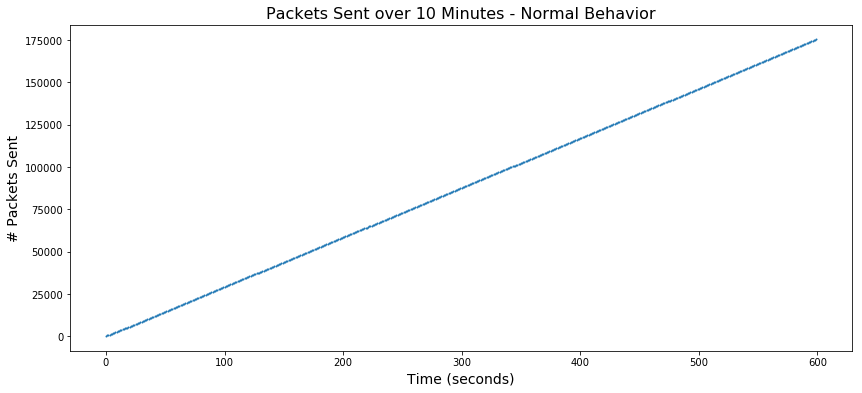

In [14]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_norm), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Normal Behavior", fontsize=16)
plt.show()

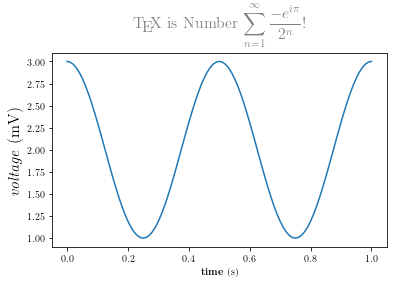

In [15]:
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

In [16]:
latexify()

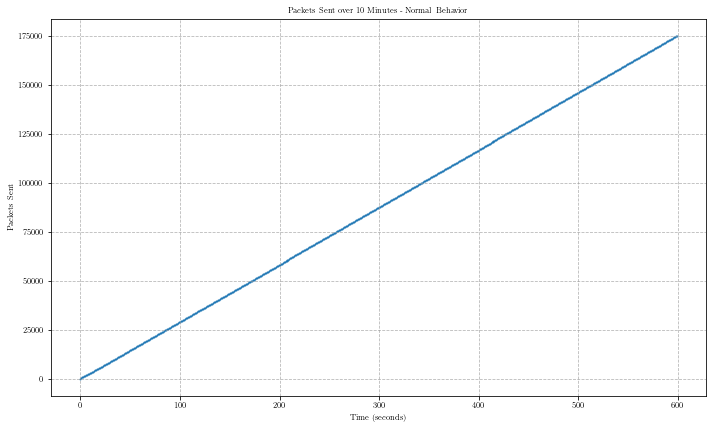

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_norm), s=1)
plt.xlabel(r"Time (seconds)")
plt.ylabel(r"# Packets Sent")
plt.title(r"Packets Sent over 10 Minutes - Normal Behavior")
plt.tight_layout()
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.show()

In [18]:
data = [go.Scatter(
          x=np.arange(0, 600),
          y=getPacketsSent(df_norm))]

layout = dict(
    title="Packets Sent over 10 Minutes - Normal Behavior",
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(
            visible = True
        )
    ), 
    yaxis=dict(
        title='# Packets Sent'
    )
)

iplot(dict(data=data, layout=layout))

<h2><a id="Visualizations-a-ii"></a>ii. Duplication Attack</h2>

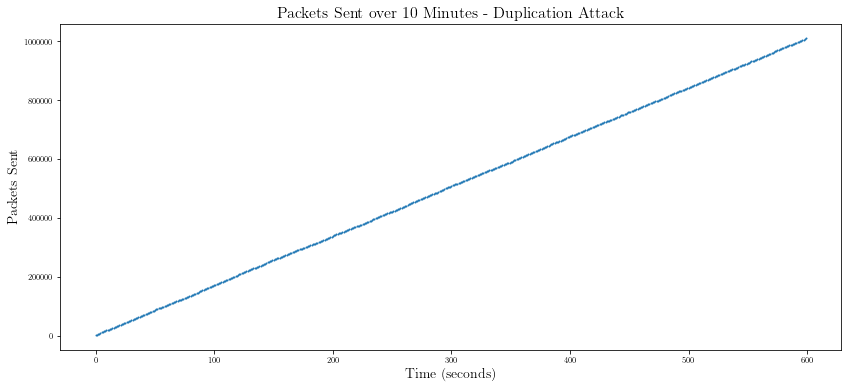

In [19]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_dup), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Duplication Attack", fontsize=16)
plt.show()

In [20]:
data = [go.Scatter(
          x=np.arange(0, 600),
          y=getPacketsSent(df_dup))]

layout = dict(
    title="Packets Sent over 10 Minutes - Duplication Attack",
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(
            visible = True
        )
    ), 
    yaxis=dict(
        title='# Packets Sent'
    )
)

iplot(dict(data=data, layout=layout))

<h2><a id="Visualizations-a-iii"></a>iii. Tampering Attack</h2>

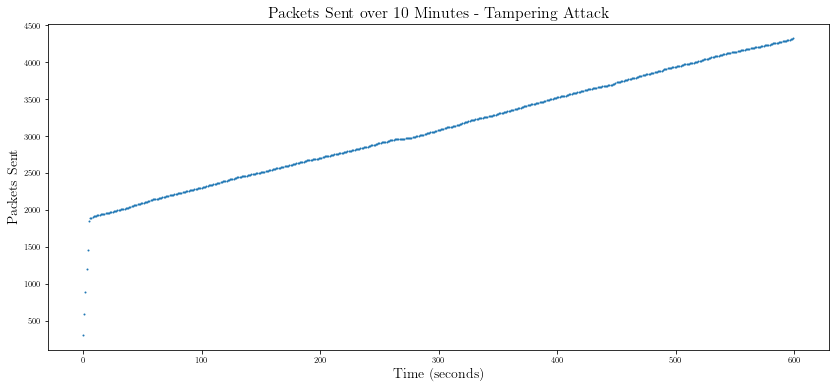

In [21]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_tamper), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Tampering Attack", fontsize=16)
plt.show()

In [22]:
data = [go.Scatter(
          x=np.arange(0, 600),
          y=getPacketsSent(df_tamper))]

layout = dict(
    title="Packets Sent over 10 Minutes - Tampering Attack",
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(
            visible = True
        )
    ), 
    yaxis=dict(
        title='# Packets Sent'
    )
)

iplot(dict(data=data, layout=layout))

<h2><a id="Visualizations-a-iv"></a>iv. Dropping Attack</h2>

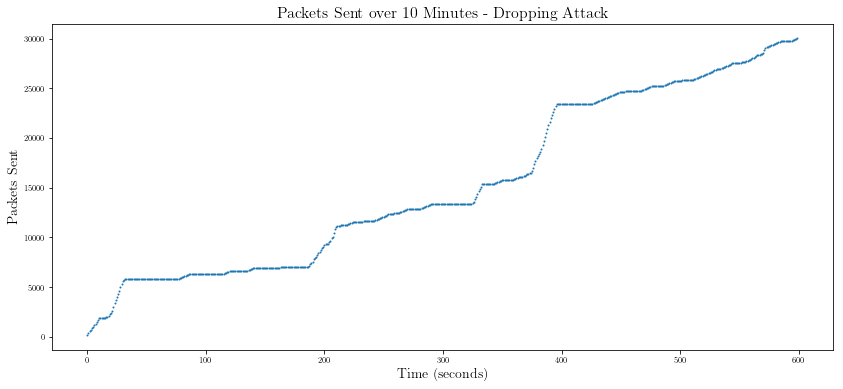

In [23]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_drop), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Dropping Attack", fontsize=16)
plt.show()

In [24]:
data = [go.Scatter(
          x=np.arange(0, 600),
          y=getPacketsSent(df_drop))]

layout = dict(
    title="Packets Sent over 10 Minutes - Dropping Attack",
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(
            visible = True
        )
    ), 
    yaxis=dict(
        title='# Packets Sent'
    )
)

iplot(dict(data=data, layout=layout))

<h2><a id="Visualizations-a-v"></a>v. Duplication + Dropping Attack</h2>

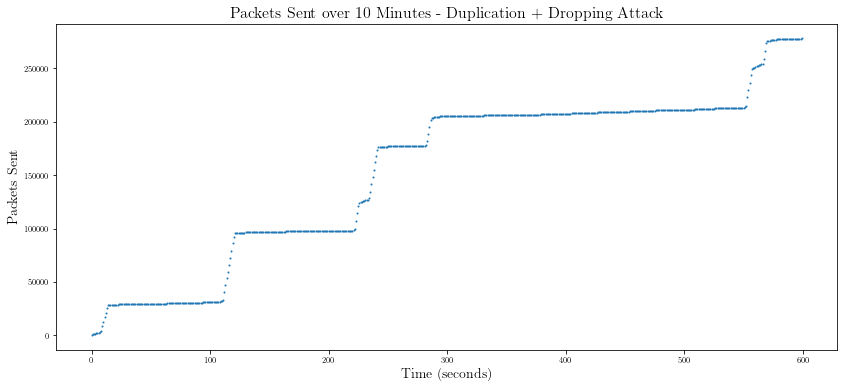

In [25]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_dup_drop), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Duplication + Dropping Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-a-vi"></a>vi. Duplication + Tampering Attack</h2>

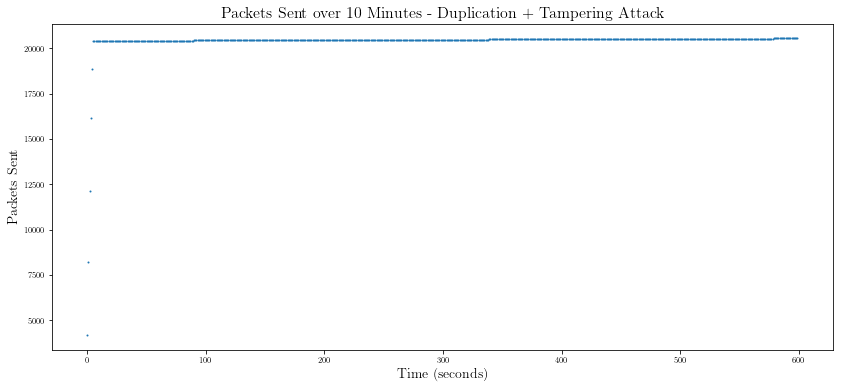

In [26]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_dup_tamper), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Duplication + Tampering Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-a-vii"></a>vii. Dropping + Tampering Attack</h2>

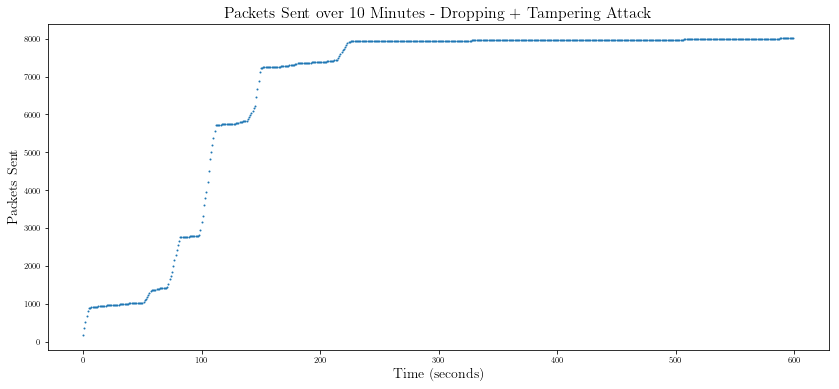

In [27]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_drop_tamper), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Dropping + Tampering Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-a-viii"></a>viii. Dropping + Duplication + Tampering Attack</h2>

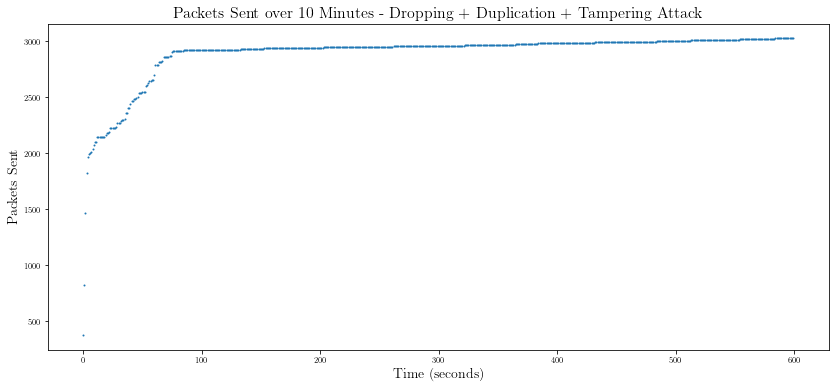

In [28]:
plt.figure(figsize=(14,6))
plt.scatter(np.arange(0, 600), getPacketsSent(df_drop_dup_tamper), s=1)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packets Sent over 10 Minutes - Dropping + Duplication + Tampering Attack", fontsize=16)
plt.show()

<h1><a id="Visualizations-b"></a>B. Packet Rate Changes Over Time</h1>

<h2><a id="Visualizations-b-i"></a>i. Normal Behavior</h2>

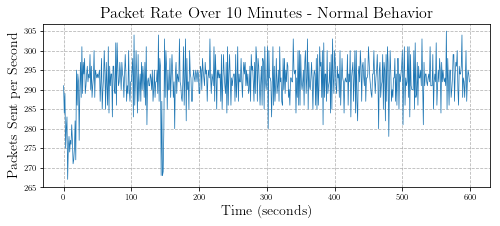

In [29]:
plt.figure(figsize=(8,3))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_norm), '-', linewidth=0.75)
plt.xlabel(r"Time (seconds)", fontsize=14)
plt.ylabel(r"Packets Sent per Second", fontsize=14)
plt.title(r"Packet Rate Over 10 Minutes - Normal Behavior", fontsize=16)
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.show()

<h2><a id="Visualizations-b-ii"></a>ii. Duplication Attack</h2>

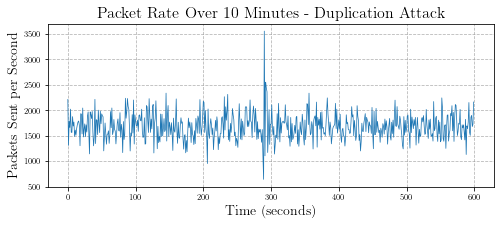

In [30]:
plt.figure(figsize=(8,3))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_dup), '-', linewidth=0.75)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Packets Sent per Second", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Duplication Attack", fontsize=16)
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.show()

<h2><a id="Visualizations-b-iii"></a>iii. Tampering Attack</h2>

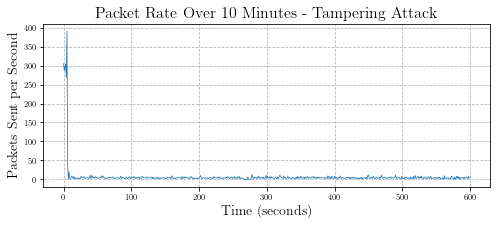

In [31]:
plt.figure(figsize=(8,3))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_tamper), '-', linewidth=0.75)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Packets Sent per Second", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Tampering Attack", fontsize=16)
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.show()

<h2><a id="Visualizations-b-iv"></a>iv. Dropping Attack</h2>

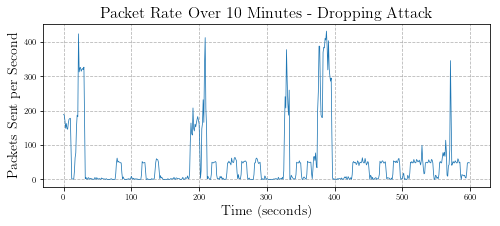

In [32]:
plt.figure(figsize=(8,3))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_drop), '-', linewidth=0.75)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Packets Sent per Second", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Dropping Attack", fontsize=16)
plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.show()

<h2><a id="Visualizations-b-v"></a>v. Duplication + Dropping Attack</h2>

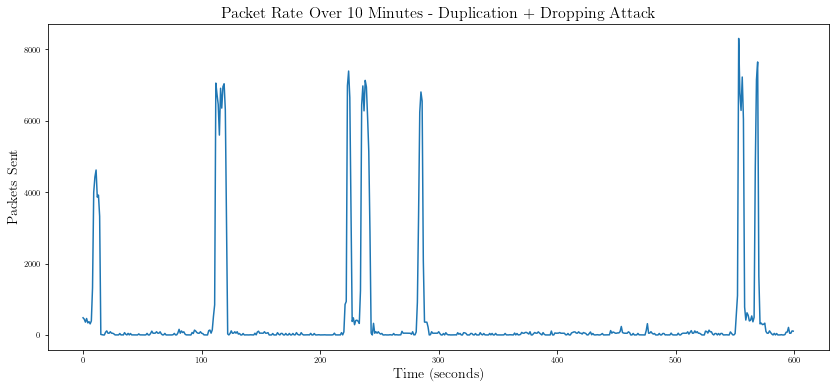

In [33]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_dup_drop), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Duplication + Dropping Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-b-vi"></a>vi. Duplication + Tampering Attack</h2>

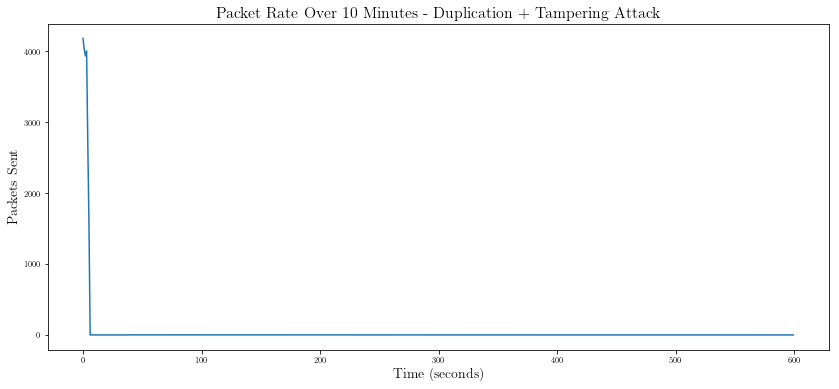

In [34]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_dup_tamper), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Duplication + Tampering Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-b-vii"></a>vii. Dropping + Tampering Attack</h2>

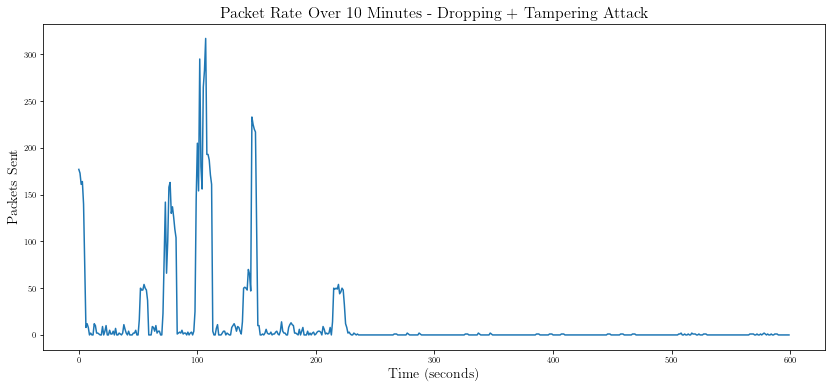

In [35]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_drop_tamper), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Dropping + Tampering Attack", fontsize=16)
plt.show()

<h2><a id="Visualizations-b-viii"></a>viii. Dropping + Duplication + Tampering Attack</h2>

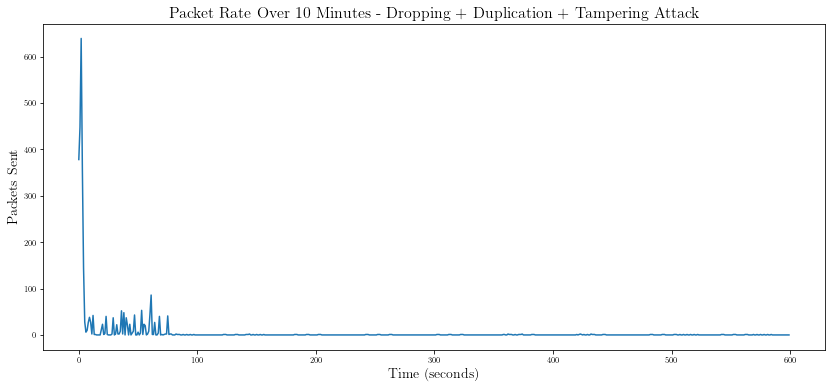

In [36]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 600), getPacketSpeeds(df_drop_dup_tamper), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 10 Minutes - Dropping + Duplication + Tampering Attack", fontsize=16)
plt.show()

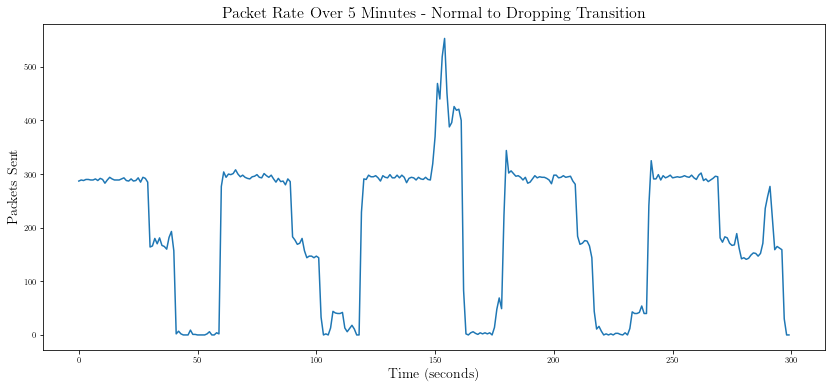

In [37]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 300), getPacketSpeeds(df_drop_transition, 300), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 5 Minutes - Normal to Dropping Transition", fontsize=16)
plt.show()

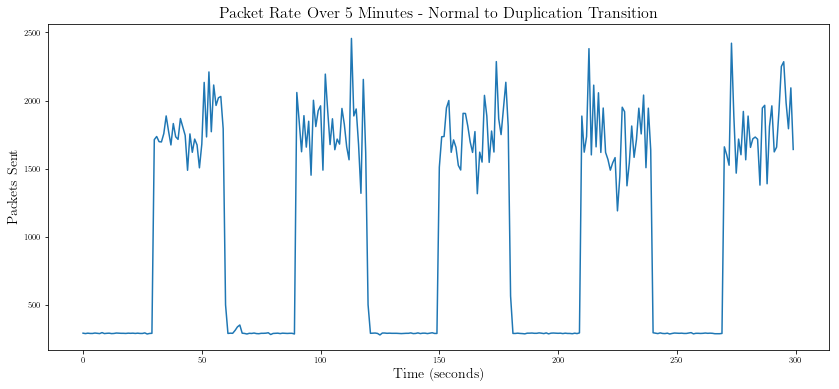

In [72]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 300), getPacketSpeeds(df_dup_transition, 300), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 5 Minutes - Normal to Duplication Transition", fontsize=16)
plt.show()

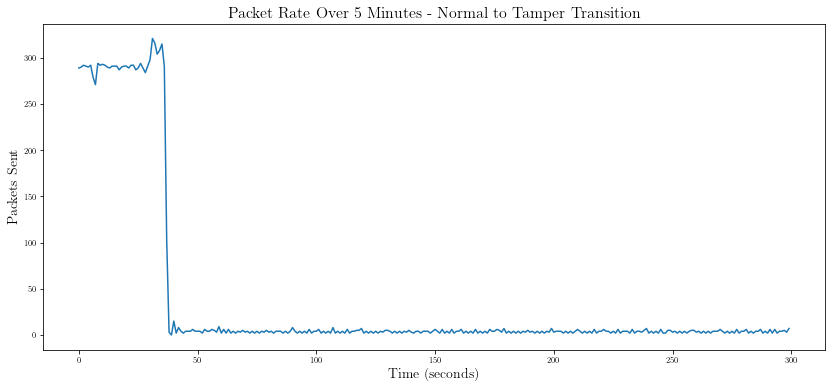

In [73]:
plt.figure(figsize=(14,6))
plt.plot(np.arange(0, 300), getPacketSpeeds(df_tamper_transition, 300), '-')
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("# Packets Sent", fontsize=14)
plt.title("Packet Rate Over 5 Minutes - Normal to Tamper Transition", fontsize=16)
plt.show()

<h1><a id="Visualizations-c"></a>C. Interactive Plot</h1>

In [38]:
def updateVisibility(selected_type):
    visibilityValues = []
    for plot_datum in plot_data:
        if plot_datum['Type'] == selected_type:
            visibilityValues.append(True)
        else:
            visibilityValues.append(False)
    return visibilityValues

norm_total = {'x': np.arange(0, 600), 'y': getPacketsSent(df_norm)}
dup_total = {'x': np.arange(0, 600), 'y': getPacketsSent(df_dup)}
tamper_total = {'x': np.arange(0, 600), 'y': getPacketsSent(df_tamper)}
drop_total = {'x': np.arange(0, 600), 'y': getPacketsSent(df_drop)}

norm_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_norm)}
dup_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_dup)}
tamper_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_tamper)}
drop_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_drop)}

data = []
buttons_data = []
buttons_labels = ["Total Packets Sent", "Packet Speed"]
plot_data = [{"Title": "No Manipulation", "Type": "Total Packets Sent", "Data": norm_total, "Color": "rgb(77, 82, 91)"}, 
             {"Title": "Duplication", "Type": "Total Packets Sent", "Data": dup_total, "Color": "rgb(104, 156, 249)"}, 
             {"Title": "Tampering", "Type": "Total Packets Sent", "Data": tamper_total, "Color": "rgb(249, 104, 104)"}, 
             {"Title": "Dropping", "Type": "Total Packets Sent", "Data": drop_total, "Color": "rgb(104, 249, 133)"},
             {"Title": "No Manipulation", "Type": "Packet Speed", "Data": norm_speed, "Color": "rgb(77, 82, 91)"}, 
             {"Title": "Duplication", "Type": "Packet Speed", "Data": dup_speed, "Color": "rgb(104, 156, 249)"}, 
             {"Title": "Tampering", "Type": "Packet Speed", "Data": tamper_speed, "Color": "rgb(249, 104, 104)"}, 
             {"Title": "Dropping", "Type": "Packet Speed", "Data": drop_speed, "Color": "rgb(104, 249, 133)"}]

for button_label in buttons_labels:
    buttons_data.append(dict(
        label = button_label,
        method = 'update',
        args = [{'visible': updateVisibility(button_label)}]
    ))
    
for plot_datum in plot_data:
    data.append(go.Scatter(
        x=plot_datum["Data"]["x"],
        y=plot_datum["Data"]["y"],
        mode='lines+markers',
        line=dict(
            color=plot_datum["Color"],
            width=1
        ),
        marker = dict(
            size = 1
        ),
        name=plot_datum["Title"],
        text=plot_datum["Title"],
        visible=(plot_datum["Type"]=='Total Packets Sent')
    ))
    

updatemenus = list([
    dict(active=0,
         buttons= buttons_data,
         direction = 'down',
         pad = {'r': 10, 't': 10},
         showactive = True,
         x = 0,
         xanchor = 'center',
         y = 1.3,
         yanchor = 'top'
    )
])
    
layout = dict(
    title='Packet Monitoring',
    updatemenus = updatemenus,
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(),
        autorange=True
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [35]:
plot(fig, filename='chart10mins.html')

'chart10mins.html'

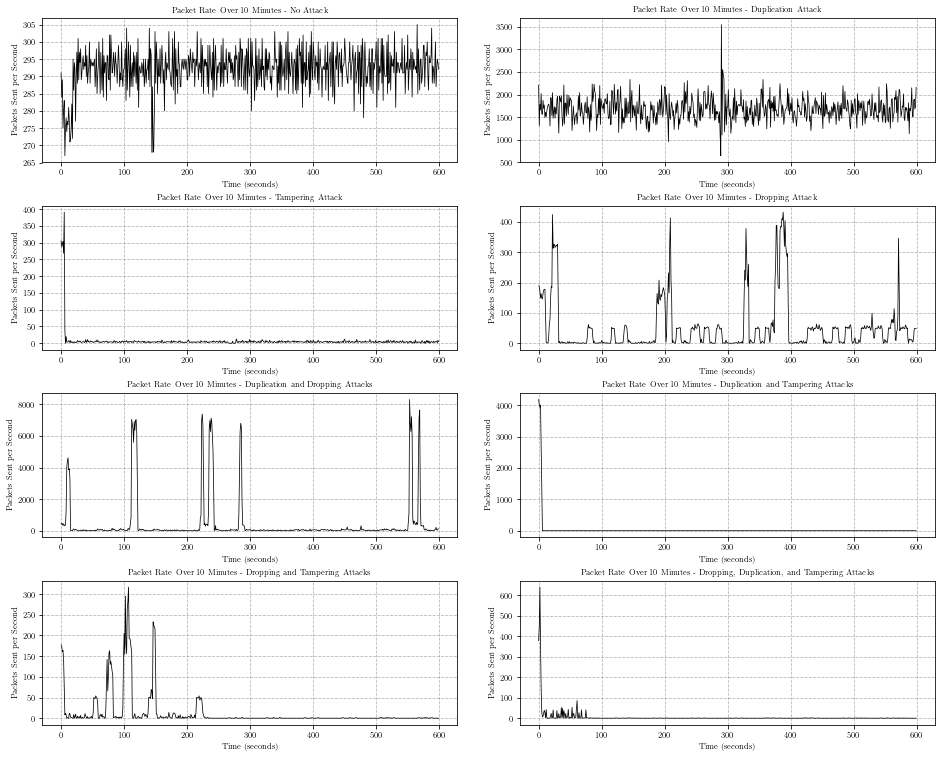

In [39]:
subplot_data = [df_norm, df_dup, df_tamper, df_drop, 
                df_dup_drop, df_dup_tamper, df_drop_tamper, df_drop_dup_tamper]
subplot_titles = ['No Attack', 'Duplication Attack', 'Tampering Attack', 'Dropping Attack', 
                  'Duplication and Dropping Attacks', 'Duplication and Tampering Attacks', 
                  'Dropping and Tampering Attacks', 'Dropping, Duplication, and Tampering Attacks']
fig = plt.figure(figsize=(16,13))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    ax.plot(np.arange(0, 600), getPacketSpeeds(subplot_data[i-1]), '-', linewidth=0.75, c="black")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Packets Sent per Second")
    ax.set_title("Packet Rate Over 10 Minutes - " + subplot_titles[i-1])
    ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)

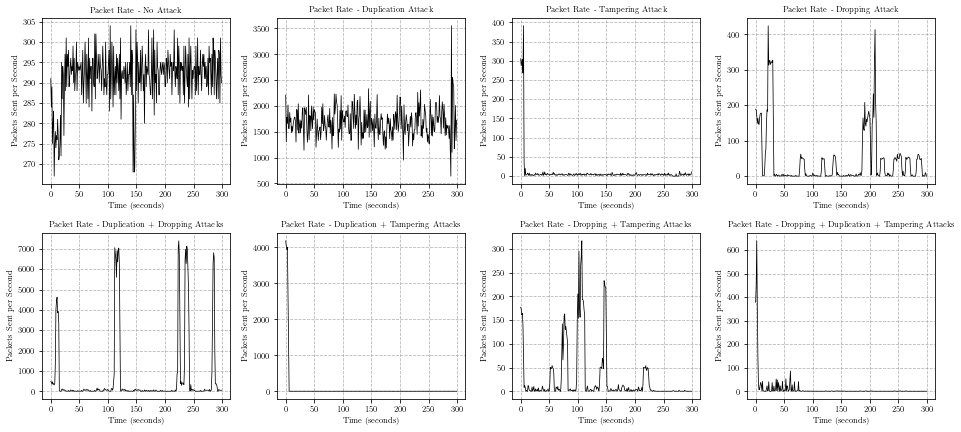

In [105]:
subplot_data = [df_norm, df_dup, df_tamper, df_drop, 
                df_dup_drop, df_dup_tamper, df_drop_tamper, df_drop_dup_tamper]
subplot_titles = [r'No Attack', 'Duplication Attack', r'Tampering Attack', r'Dropping Attack', 
                  r'Duplication + Dropping Attacks', r'Duplication + Tampering Attacks', 
                  r'Dropping + Tampering Attacks', r'Dropping + Duplication + Tampering Attacks']
fig = plt.figure(figsize=(16,7))
fig.subplots_adjust(hspace=0.3, wspace=0.25)
for i in range(1, 9):
    ax = fig.add_subplot(2, 4, i)
    ax.plot(np.arange(0, 300), getPacketSpeeds(subplot_data[i-1])[0:300], '-', linewidth=0.75, c="black")
    ax.set_xlabel(r"Time (seconds)")
    ax.set_ylabel(r"Packets Sent per Second")
    ax.set_title(r"Packet Rate - " + subplot_titles[i-1])
    ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)

plt.savefig("MLPacketSpeed.jpg", dpi=300)

In [15]:
latexify()

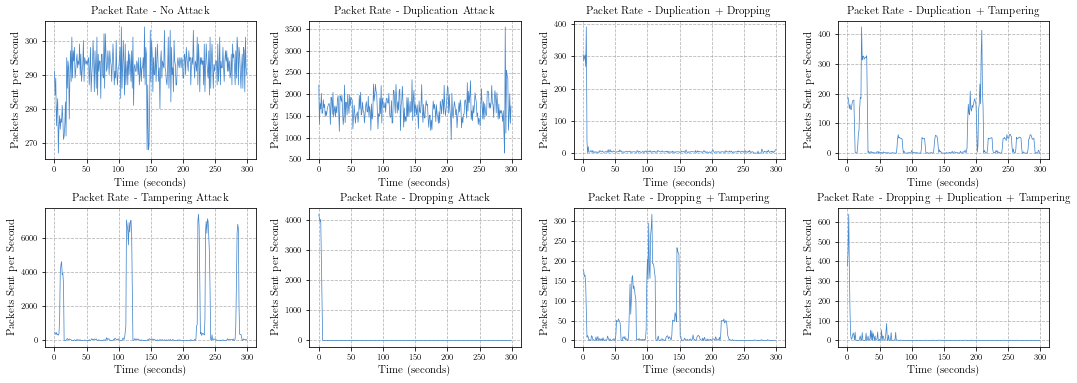

In [94]:
subplot_data = [df_norm, df_dup, df_tamper, df_drop, 
                df_dup_drop, df_dup_tamper, df_drop_tamper, df_drop_dup_tamper]
subplot_titles = [r'No Attack', 'Duplication Attack', 
                  r'Duplication + Dropping', r'Duplication + Tampering', 
                  r'Tampering Attack', r'Dropping Attack', 
                  r'Dropping + Tampering', r'Dropping + Duplication + Tampering']
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.35, wspace=0.25)
for i in range(1, 9):
    ax = fig.add_subplot(2, 4, i)
    ax.plot(np.arange(0, 300), getPacketSpeeds(subplot_data[i-1])[0:300], '-', linewidth=0.75, c="#4587cc")
    ax.set_xlabel(r"Time (seconds)", fontsize=11)
    ax.set_ylabel(r"Packets Sent per Second", fontsize=11)
    ax.set_title(r"Packet Rate - " + subplot_titles[i-1], fontsize=11)
    ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)

plt.savefig("MLPacketSpeedColored.jpg", dpi=300)

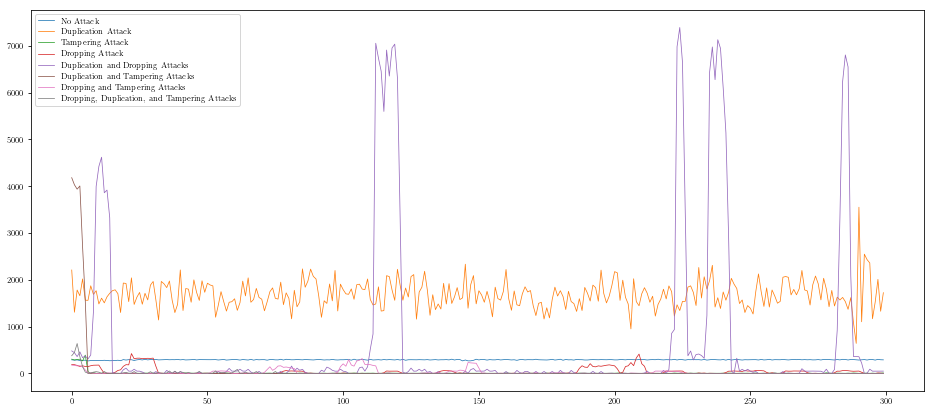

In [41]:
subplot_data = [df_norm, df_dup, df_tamper, df_drop, 
                df_dup_drop, df_dup_tamper, df_drop_tamper, df_drop_dup_tamper]
subplot_titles = ['No Attack', 'Duplication Attack', 'Tampering Attack', 'Dropping Attack', 
                  'Duplication and Dropping Attacks', 'Duplication and Tampering Attacks', 
                  'Dropping and Tampering Attacks', 'Dropping, Duplication, and Tampering Attacks']
fig = plt.figure(figsize=(16,7))
for i in range(1, 9):
    plt.plot(np.arange(0, 300), getPacketSpeeds(subplot_data[i-1])[0:300], '-', linewidth=0.75, label=subplot_titles[i-1])
#     plt.set_xlabel("Time (seconds)")
#     ax.set_ylabel("Packets Sent per Second")
#     ax.set_title("Packet Rate Over 5 Minutes - " + subplot_titles[i-1])
#     ax.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

<h1 class="section-header"><a id="Classifiers"></a>Classifiers</h1>

<h1><a id="Classifiers-a"></a>A. Feature Extraction</h1>

<h2><a id="Classifiers-a-i"></a>i. tsfresh</h2>

In [16]:
dataframes = [{'data':df_norm, 'y_value':"Normal"}, {'data':df_tamper, 'y_value':"Tamper"}, {'data':df_dup, 'y_value':"Duplication"}, {'data':df_drop, 'y_value':"Dropping"}]
y_store = []
df_store = []
sample_id = 0
for df_i in range(len(dataframes)):
    y_val = dataframes[df_i]['y_value']
    for chunk in np.split(np.array(getPacketSpeeds(dataframes[df_i]['data'])), 40):
        y_store.append(y_val)
        for chunk_i in range(len(chunk)):
            df_store.append({'id':sample_id, 'time':chunk_i, 'val':chunk[chunk_i]})
        sample_id += 1

df = pd.DataFrame(df_store)
y = pd.Series(y_store)

In [17]:
df

,id,time,val
0,0,0,291
1,0,1,284
2,0,2,289
3,0,3,275
4,0,4,280
5,0,5,283
6,0,6,267
7,0,7,275
8,0,8,278
9,0,9,274


In [18]:
y

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
5        Normal
6        Normal
7        Normal
8        Normal
9        Normal
10       Normal
11       Normal
12       Normal
13       Normal
14       Normal
15       Normal
16       Normal
17       Normal
18       Normal
19       Normal
20       Normal
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Normal
29       Normal
         ...   
130    Dropping
131    Dropping
132    Dropping
133    Dropping
134    Dropping
135    Dropping
136    Dropping
137    Dropping
138    Dropping
139    Dropping
140    Dropping
141    Dropping
142    Dropping
143    Dropping
144    Dropping
145    Dropping
146    Dropping
147    Dropping
148    Dropping
149    Dropping
150    Dropping
151    Dropping
152    Dropping
153    Dropping
154    Dropping
155    Dropping
156    Dropping
157    Dropping
158    Dropping
159    Dropping
Length: 160, dtype: obje

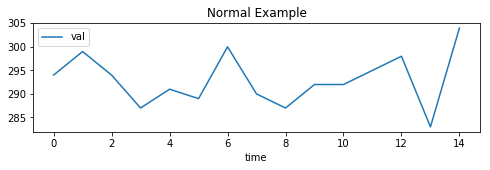

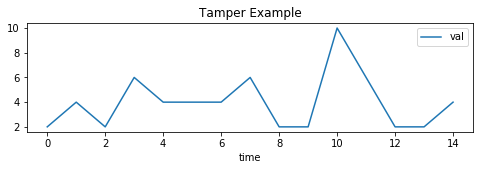

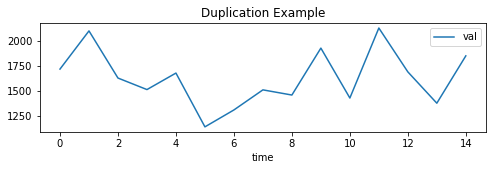

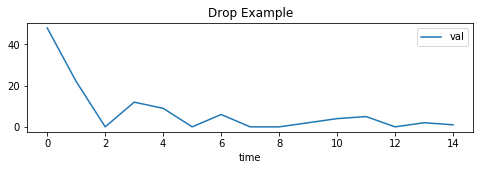

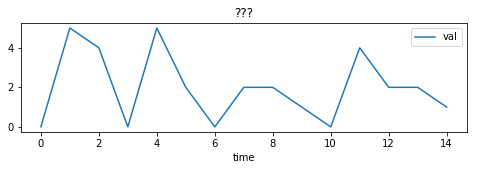

In [19]:
df[df.id == 6][['time', 'val']].plot(x='time', title='Normal Example', figsize=(8, 2));
df[df.id == 50][['time', 'val']].plot(x='time', title='Tamper Example', figsize=(8, 2));
df[df.id == 100][['time', 'val']].plot(x='time', title='Duplication Example', figsize=(8, 2));
df[df.id == 150][['time', 'val']].plot(x='time', title='Drop Example', figsize=(8, 2));
df[df.id == 123][['time', 'val']].plot(x='time', title='???', figsize=(8, 2));

In [20]:
extraction_settings = ComprehensiveFCParameters()

In [21]:
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.59s/it]


In [22]:
X.head()

variable,val__abs_energy,val__absolute_sum_of_changes,"val__agg_autocorrelation__f_agg_""mean""__maxlag_40","val__agg_autocorrelation__f_agg_""median""__maxlag_40","val__agg_autocorrelation__f_agg_""var""__maxlag_40","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","val__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,val__symmetry_looking__r_0.9,val__symmetry_looking__r_0.9500000000000001,val__time_reversal_asymmetry_statistic__lag_1,val__time_reversal_asymmetry_statistic__lag_2,val__time_reversal_asymmetry_statistic__lag_3,val__value_count__value_-1,val__value_count__value_0,val__value_count__value_1,val__variance,val__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,1164282.0,84.0,-0.318277,-0.084787,0.458073,291.0,-1.0,-10.0,0.0,0.0,...,1.0,1.0,-327310.538462,-4.920471e+05,-8.003561e+05,0.0,0.0,0.0,37.982222,1.0
1,1237951.0,139.0,-0.360882,-0.189682,0.396928,295.0,1.0,6.0,0.0,0.0,...,1.0,1.0,481305.307692,1.094408e+06,1.451703e+06,0.0,0.0,0.0,84.515556,1.0
2,1289634.0,61.0,-0.067411,-0.174145,0.118556,299.0,-1.0,-3.0,0.0,0.0,...,1.0,1.0,-106346.230769,-6.222636e+04,-9.548111e+04,0.0,0.0,0.0,9.360000,1.0
3,1285611.0,65.0,-0.107310,-0.109689,0.281267,300.0,-1.0,-2.0,0.0,0.0,...,1.0,1.0,-65854.923077,-1.725083e+05,-3.579941e+05,0.0,0.0,0.0,14.595556,1.0
4,1284094.0,114.0,0.000876,0.012714,0.255850,301.0,-1.0,-5.0,0.0,0.0,...,1.0,1.0,-27088.615385,-1.081755e+05,1.350256e+04,0.0,0.0,0.0,30.515556,1.0


<h1><a id="Classifiers-b"></a>B. Feature Filtering</h1>

<h2><a id="Classifiers-b-i"></a>i. tsfresh</h2>

In [23]:
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='time',
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.38s/it]


In [24]:
X_filtered.head()

variable,"val__fft_aggregated__aggtype_""variance""","val__fft_aggregated__aggtype_""centroid""",val__sum_of_reoccurring_data_points,val__sum_of_reoccurring_values,"val__fft_aggregated__aggtype_""skew""","val__fft_aggregated__aggtype_""kurtosis""",val__autocorrelation__lag_1,val__partial_autocorrelation__lag_1,val__cid_ce__normalize_True,val__sample_entropy,...,"val__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6",val__symmetry_looking__r_0.30000000000000004,val__ratio_value_number_to_time_series_length,val__has_duplicate_max,"val__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","val__fft_coefficient__coeff_1__attr_""real""",val__percentage_of_reoccurring_datapoints_to_all_datapoints,"val__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6",val__percentage_of_reoccurring_values_to_all_values,"val__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
0,0.671843,0.138928,1104.0,552.0,6.510976,45.365282,0.179875,0.179875,4.401987,2.169054,...,3.0,1.0,0.866667,0.0,0.0,31.847458,0.153846,0.0,0.266667,0.0
1,0.918603,0.189438,1138.0,569.0,5.584250,33.551005,0.199497,0.199497,4.533479,3.044522,...,2.0,1.0,0.866667,0.0,0.0,-27.783688,0.153846,0.0,0.266667,0.0
2,0.405701,0.077271,2642.0,1174.0,1.832407,6.058999,-0.323871,-0.323871,6.244656,2.862201,...,2.0,1.0,0.666667,0.0,0.0,-6.051522,0.400000,0.0,0.600000,0.0
3,0.502010,0.097991,2351.0,882.0,7.741466,63.330613,-0.347486,-0.347486,6.008900,2.708050,...,1.0,1.0,0.666667,0.0,0.0,0.997040,0.300000,1.0,0.533333,0.0
4,0.699398,0.136813,2352.0,881.0,6.489552,44.494378,-0.534039,-0.534039,6.536995,2.014903,...,0.0,1.0,0.666667,0.0,0.0,9.573739,0.300000,0.0,0.533333,0.0


<h2><a id="Classifiers-b-ii"></a>ii. Select K Best</h2>

In [29]:
selector = SelectKBest(f_classif, k=5)
X_filtered_2 = selector.fit_transform(X_filtered, y)
cols = selector.get_support()
Selected_5_best_df = pd.DataFrame(X_filtered_2, columns=X_filtered.columns[cols])
Selected_5_best_df['type'] = y
Selected_5_best_df

variable,val__sum_values,val__mean,"val__fft_coefficient__coeff_0__attr_""abs""","val__fft_coefficient__coeff_0__attr_""real""","val__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_20",type
0,4178.0,278.533333,4178.0,4178.0,755.072842,Normal
1,4307.0,287.133333,4307.0,4307.0,779.144150,Normal
2,4398.0,293.200000,4398.0,4398.0,795.336486,Normal
3,4391.0,292.733333,4391.0,4391.0,793.974648,Normal
4,4388.0,292.533333,4388.0,4388.0,793.217654,Normal
5,4401.0,293.400000,4401.0,4401.0,796.069282,Normal
6,4395.0,293.000000,4395.0,4395.0,794.395738,Normal
7,4377.0,291.800000,4377.0,4377.0,791.562542,Normal
8,4376.0,291.733333,4376.0,4376.0,791.198394,Normal
9,4316.0,287.733333,4316.0,4316.0,780.404761,Normal


In [30]:
for feature in Selected_5_best_df.columns:
    if feature != 'type':
        print(feature)
        for attack_type in Selected_5_best_df.type.unique():
            print(attack_type, np.log(Selected_5_best_df[Selected_5_best_df.type == attack_type][feature].mean()))
        print()

data = []

for attack_type in Selected_5_best_df.type.unique():
    row = []
    for feature in Selected_5_best_df.columns:
        if feature != 'type':
            print(attack_type, np.log(Selected_5_best_df[Selected_5_best_df.type == attack_type][feature].mean()))
            row.append(np.log(Selected_5_best_df[Selected_5_best_df.type == attack_type][feature].mean()))
    data.append(row)
    print()

print(data)

val__sum_values
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__mean
Normal 5.677267369
Tamper 1.97500652354
Duplication 7.42839360037
Dropping 3.9126228255

val__fft_coefficient__coeff_0__attr_"abs"
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__fft_coefficient__coeff_0__attr_"real"
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_20
Normal 6.67507179577
Tamper 2.96747676912
Duplication 8.42658249121
Dropping 4.90034732129

Normal 8.3853175701
Normal 5.677267369
Normal 8.3853175701
Normal 8.3853175701
Normal 6.67507179577

Tamper 4.68305672465
Tamper 1.97500652354
Tamper 4.68305672465
Tamper 4.68305672465
Tamper 2.96747676912

Duplication 10.1364438015
Duplication 7.42839360037
Duplication 10.1364438015
Duplication 10.1364438015
Duplication 8.42658249121

Dropping 6.6206730266
Dropping 3.9126228

In [68]:
selector = SelectKBest(f_classif, k=10)
X_filtered_2 = selector.fit_transform(X_filtered, y)
cols = selector.get_support()
Selected_10_best_df = pd.DataFrame(X_filtered_2, columns=X_filtered.columns[cols])
Selected_10_best_df['type'] = y

for feature in Selected_10_best_df.columns:
    if feature != 'type':
        print(feature)
        for attack_type in Selected_10_best_df.type.unique():
            print(attack_type, np.log(Selected_10_best_df[Selected_10_best_df.type == attack_type][feature].mean()))
        print()

data = []

for attack_type in Selected_10_best_df.type.unique():
    row = []
    for feature in Selected_10_best_df.columns:
        if feature != 'type':
            print(attack_type, np.log(Selected_10_best_df[Selected_10_best_df.type == attack_type][feature].mean()))
            row.append(np.log(Selected_10_best_df[Selected_10_best_df.type == attack_type][feature].mean()))
    data.append(row)
    print()

print(data)

val__quantile__q_0.3
Normal 5.66958777657
Tamper 1.0206507472
Duplication 7.34874839315
Dropping 3.34937763293

val__sum_values
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__mean
Normal 5.677267369
Tamper 1.97500652354
Duplication 7.42839360037
Dropping 3.9126228255

val__fft_coefficient__coeff_0__attr_"abs"
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__fft_coefficient__coeff_0__attr_"real"
Normal 8.3853175701
Tamper 4.68305672465
Duplication 10.1364438015
Dropping 6.6206730266

val__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_20
Normal 6.67507179577
Tamper 2.96747676912
Duplication 8.42658249121
Dropping 4.90034732129

val__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_6__w_20
Normal 6.614072426
Tamper 2.94555541237
Duplication 8.36704988665
Dropping 4.82495124435

val__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_7__w_10
Normal 6.81135526456
Tamper 3.08501438872
Duplication 8.

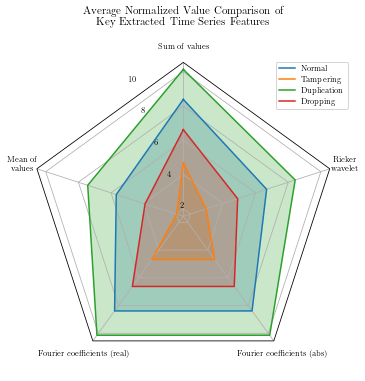

In [67]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


data = [['Sum of values', 'Mean of \n values', 'Fourier coefficients (real)', 
         'Fourier coefficients (abs)', 'Ricker \n wavelet'],
        ('Average Normalized Value Comparison of \n Key Extracted Time Series Features', [
            [8.3853175701026554, 5.6772673690004458, 8.3853175701026554, 8.3853175701026554, 6.675071795773218], 
            [4.6830567246451622, 1.9750065235429524, 4.6830567246451622, 4.6830567246451622, 2.9674767691224599], 
            [10.136443801470111, 7.4283936003679001, 10.136443801470111, 10.136443801470111, 8.4265824912068918], 
            [6.6206730266023239, 3.9126228255001139, 6.6206730266023239, 6.6206730266023239, 4.900347321291366]])]

N = len(data[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = data.pop(0)
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(5.2, 5.2), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([2, 4, 6, 8, 10])
ax.set_title(title,  position=(0.5, 1.1), ha='center', fontsize=11)

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

labels = ('Normal', 'Tampering', 'Duplication', 'Dropping')
legend = ax.legend(labels, loc=(0.8, .85),
                       labelspacing=0.5, fontsize='medium')

plt.tight_layout()
plt.savefig("RadarChart.jpg", dpi=300)
plt.show()

In [32]:
X_filtered_2 = SelectKBest(f_classif, k=50).fit_transform(X_filtered, y)
print(X_filtered.shape)
print(X_filtered_2.shape)
X_filtered_2

(160, 212)
(160, 50)


array([[ 272.2       ,  274.8       ,  275.2       , ...,  401.25885647,
         280.8       ,  283.2       ],
       [ 273.2       ,  276.6       ,  282.8       , ...,  423.71216657,
         293.6       ,  295.4       ],
       [ 289.4       ,  290.8       ,  291.2       , ...,  425.66712629,
         294.        ,  296.        ],
       ..., 
       [  22.8       ,   42.2       ,   48.        , ...,   78.48265541,
          67.8       ,   78.2       ],
       [  46.8       ,   48.        ,   48.        , ...,   75.13098604,
          55.6       ,   65.2       ],
       [   4.4       ,    9.        ,   12.        , ...,   44.0637317 ,
          42.4       ,   48.        ]])

<h2><a id="Classifiers-b-iii"></a>iii. Principal Component Analysis</h2>

In [33]:
pca = PCA(n_components=50)
X_filtered_3 = pca.fit_transform(X_filtered) 
X_filtered_3

array([[ -2.05223484e+09,   2.56237603e+06,   2.13435274e+05, ...,
         -3.64750007e+01,  -2.07352821e+01,   3.15610363e+01],
       [ -2.04803607e+09,   2.70858182e+06,   2.40720007e+05, ...,
         -3.12661513e+01,  -1.70694285e+01,   2.96950226e+01],
       [ -2.04564771e+09,   2.71642678e+06,   7.84811935e+04, ...,
          1.44704815e+00,   9.82862776e+00,   8.15848906e+00],
       ..., 
       [ -2.08895470e+09,   2.85420781e+06,   1.19237786e+05, ...,
         -1.10978424e+01,   1.64090248e+01,  -4.51865471e+01],
       [ -2.08861808e+09,   2.47247340e+06,   1.34176037e+05, ...,
         -7.19708174e+00,   7.10367701e+00,   1.49674277e+01],
       [ -2.08931805e+09,   2.86206431e+06,   1.08804860e+05, ...,
         -3.02228825e+01,   1.58721085e+02,   1.13884901e+01]])

<h1><a id="Classifiers-c"></a>C. Machine Learning Models</h1>

<h2><a id="Classifiers-c-i"></a>i. Decision Tree</h2>

In [34]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

    Dropping       0.87      0.87      0.87        15
 Duplication       0.88      1.00      0.93        14
      Normal       1.00      1.00      1.00        16
      Tamper       1.00      0.89      0.94        19

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



In [35]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl2 = DecisionTreeClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       0.94      0.89      0.91        18
 Duplication       1.00      1.00      1.00        13
      Normal       0.90      1.00      0.95        19
      Tamper       1.00      0.93      0.96        14

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.96        64
weighted avg       0.96      0.95      0.95        64



In [36]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered_2, y, test_size=.4)
cl6 = DecisionTreeClassifier()
cl6.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl6.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       0.82      0.75      0.78        12
 Duplication       1.00      1.00      1.00        19
      Normal       0.94      0.94      0.94        17
      Tamper       0.88      0.94      0.91        16

    accuracy                           0.92        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.92      0.92      0.92        64



In [50]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered_3, y, test_size=.4)
cl6 = DecisionTreeClassifier()
cl6.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl6.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       1.00      0.94      0.97        18
 Duplication       1.00      1.00      1.00        14
      Normal       0.94      1.00      0.97        16
      Tamper       1.00      1.00      1.00        16

    accuracy                           0.98        64
   macro avg       0.99      0.99      0.99        64
weighted avg       0.99      0.98      0.98        64



<h2><a id="Classifiers-c-ii"></a>ii. Multilayer Perceptron (Neural Network)</h2>

In [51]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
scaler = StandardScaler()  
scaler.fit(X_filtered_train) 
cl5 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
cl5.fit(scaler.transform(X_filtered_train), y_train)
print(classification_report(y_test, cl5.predict(scaler.transform(X_filtered_test))))

              precision    recall  f1-score   support

    Dropping       0.41      0.81      0.54        16
 Duplication       0.85      0.92      0.88        12
      Normal       0.95      1.00      0.97        18
      Tamper       0.00      0.00      0.00        18

    accuracy                           0.66        64
   macro avg       0.55      0.68      0.60        64
weighted avg       0.53      0.66      0.57        64



<h2><a id="Classifiers-c-iii"></a>iii. SVC</h2>

In [52]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl8 = SVC(gamma='scale')
cl8.fit(X_train, y_train)
print(classification_report(y_test, cl8.predict(X_test)))

              precision    recall  f1-score   support

    Dropping       0.00      0.00      0.00        15
 Duplication       1.00      1.00      1.00        19
      Normal       0.00      0.00      0.00        16
      Tamper       0.31      1.00      0.47        14

    accuracy                           0.52        64
   macro avg       0.33      0.50      0.37        64
weighted avg       0.36      0.52      0.40        64



<h2><a id="Classifiers-c-iv"></a>iv. Logistic Regression</h2>

In [53]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl9 = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_filtered_train, y_train)
print(classification_report(y_test, cl9.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       0.47      0.88      0.61        16
 Duplication       1.00      0.93      0.97        15
      Normal       0.94      1.00      0.97        17
      Tamper       0.00      0.00      0.00        16

    accuracy                           0.70        64
   macro avg       0.60      0.70      0.64        64
weighted avg       0.60      0.70      0.64        64



<h2><a id="Classifiers-c-v"></a>v. K Nearest Neighbors</h2>

In [54]:
avg_precision = []
avg_recall = []
for k in range(2, 20):
    print("Testing k =", k)
    precision_scores = []
    recall_scores = []
    for i in range(1000):
        X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
        cl10 = KNeighborsClassifier(n_neighbors=k)
        cl10.fit(X_filtered_train, y_train)
        precision_scores.append(precision_score(y_test, cl10.predict(X_filtered_test), average="weighted"))
        recall_scores.append(recall_score(y_test, cl10.predict(X_filtered_test), average="weighted"))
    avg_precision.append(np.array(precision_scores).mean())
    avg_recall.append(np.array(recall_scores).mean())  

Testing k = 2
Testing k = 3
Testing k = 4
Testing k = 5
Testing k = 6
Testing k = 7
Testing k = 8
Testing k = 9
Testing k = 10
Testing k = 11
Testing k = 12
Testing k = 13
Testing k = 14
Testing k = 15
Testing k = 16
Testing k = 17
Testing k = 18
Testing k = 19


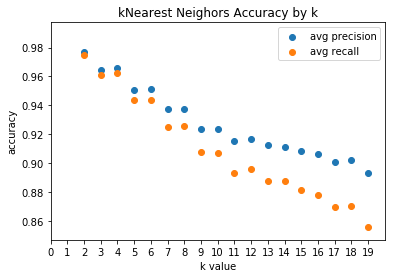

In [55]:
plt.title('kNearest Neighors Accuracy by k')
plt.scatter(range(2, 20), avg_precision, label="avg precision")
plt.scatter(range(2, 20), avg_recall, label="avg recall")
plt.xticks(range(0, 20))
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [46]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl10 = KNeighborsClassifier(n_neighbors=2)
cl10.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl10.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       0.94      0.94      0.94        16
 Duplication       1.00      1.00      1.00        14
      Normal       0.94      1.00      0.97        16
      Tamper       1.00      0.94      0.97        18

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



<h2><a id="Classifiers-c-vi"></a>vi. Random Forests</h2>

In [57]:
avg_precision = []
avg_recall = []
for n in range(2, 20):
    print("Testing n =", n)
    precision_scores = []
    recall_scores = []
    for i in range(1000):
        X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
        cl11 = RandomForestClassifier(n_estimators=n, max_depth=None,
                                      min_samples_split=2)
        cl11.fit(X_filtered_train, y_train)
        precision_scores.append(precision_score(y_test, cl11.predict(X_filtered_test), average="weighted"))
        recall_scores.append(recall_score(y_test, cl11.predict(X_filtered_test), average="weighted"))
    avg_precision.append(np.array(precision_scores).mean())
    avg_recall.append(np.array(recall_scores).mean())  

Testing n = 2
Testing n = 3
Testing n = 4
Testing n = 5
Testing n = 6
Testing n = 7
Testing n = 8
Testing n = 9
Testing n = 10
Testing n = 11
Testing n = 12
Testing n = 13
Testing n = 14
Testing n = 15
Testing n = 16
Testing n = 17
Testing n = 18
Testing n = 19


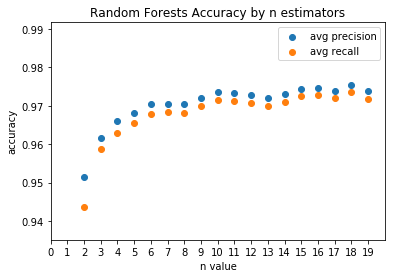

In [58]:
plt.title('Random Forests Accuracy by n estimators')
plt.scatter(range(2, 20), avg_precision, label="avg precision")
plt.scatter(range(2, 20), avg_recall, label="avg recall")
plt.xticks(range(0, 20))
plt.xlabel("n value")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [59]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl11 = RandomForestClassifier(n_estimators=18, max_depth=None,
                              min_samples_split=2, random_state=0)
cl11.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl11.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       0.93      0.93      0.93        15
 Duplication       1.00      1.00      1.00        19
      Normal       0.94      1.00      0.97        15
      Tamper       1.00      0.93      0.97        15

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



<h2><a id="Classifiers-c-vii"></a>vii. K Nearest Neighbors + Random Forests Voting</h2>

In [60]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
cl10 = KNeighborsClassifier(n_neighbors=2)
cl11 = RandomForestClassifier(n_estimators=18, max_depth=None,
                              min_samples_split=2)
cl12 = VotingClassifier(estimators=[('lr', cl10), ('rf', cl11)],
                        voting='soft')
cl12.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl12.predict(X_filtered_test)))

              precision    recall  f1-score   support

    Dropping       1.00      0.82      0.90        17
 Duplication       1.00      1.00      1.00        15
      Normal       0.90      1.00      0.95        18
      Tamper       0.93      1.00      0.97        14

    accuracy                           0.95        64
   macro avg       0.96      0.96      0.95        64
weighted avg       0.96      0.95      0.95        64



<h1 class="section-header"><a id="Results"></a>Results</h1>

<h1><a id="Results-a"></a>A. Decision Tree</h1>

In [61]:
all_times = {}
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl = DecisionTreeClassifier()
    cl.fit(X_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl.predict(X_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl.predict(X_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.948516081738
0.94365625


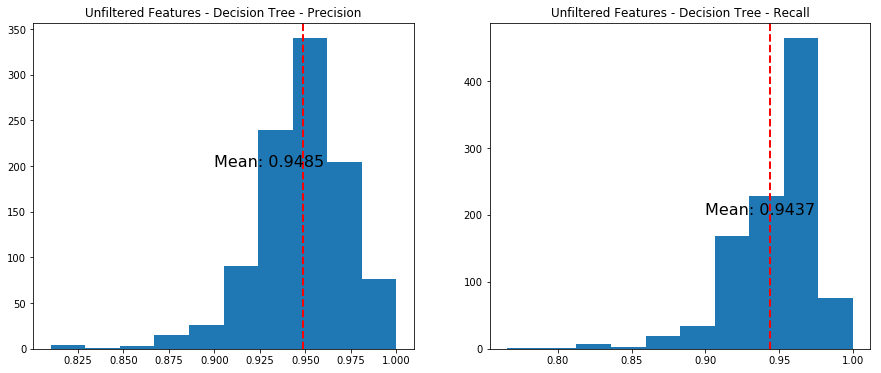

In [62]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(precision_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.title("Unfiltered Features - Decision Tree - Precision")
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(recall_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.title("Unfiltered Features - Decision Tree - Recall")
plt.show()

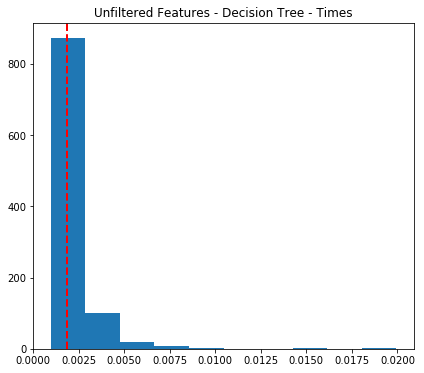

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Unfiltered Features - Decision Tree - Times")
plt.show()
all_times.update({"Unfiltered Features - Decision Tree - Times":mean(times)})

In [64]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl2 = DecisionTreeClassifier()
    cl2.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl2.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl2.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.952172666507
0.947625


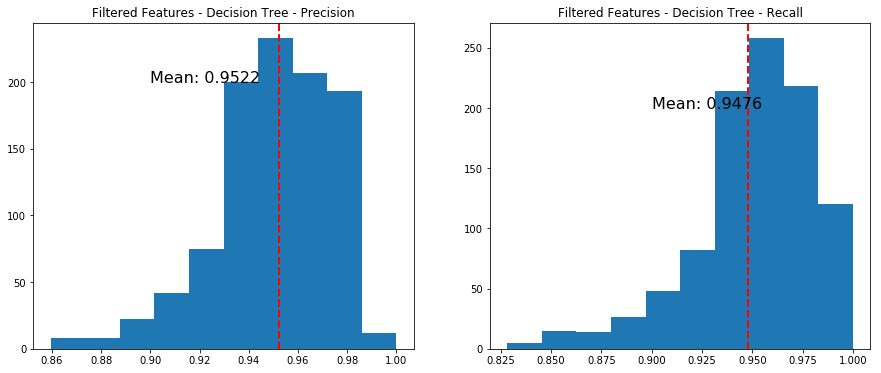

In [65]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(precision_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.title("Filtered Features - Decision Tree - Precision")
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(recall_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.title("Filtered Features - Decision Tree - Recall")
plt.show()

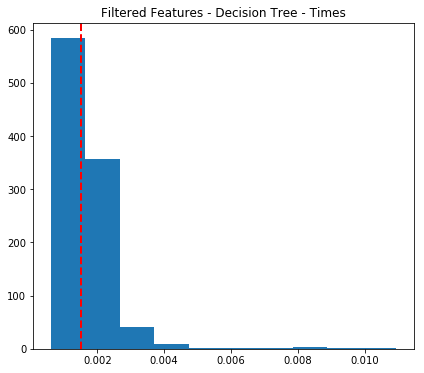

In [66]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Decision Tree - Times")
plt.show()
all_times.update({"Filtered Features - Decision Tree - Times" : mean(times)})

In [67]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered_2, y, test_size=.4)
    cl6 = DecisionTreeClassifier()
    cl6.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl6.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl6.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.960923546922
0.957765625


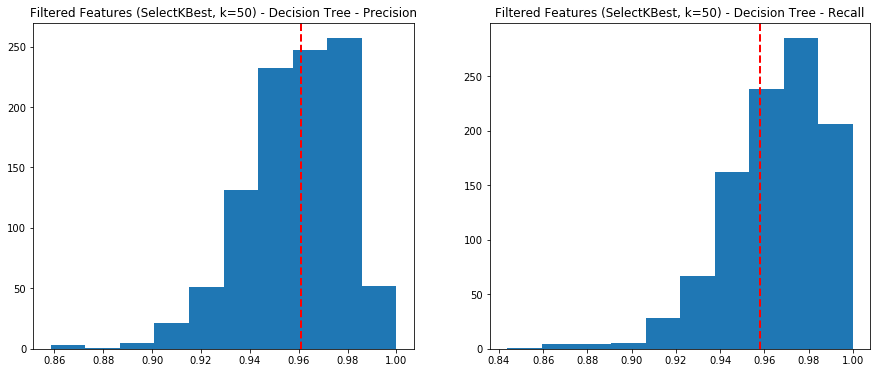

In [68]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (SelectKBest, k=50) - Decision Tree - Precision")
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (SelectKBest, k=50) - Decision Tree - Recall")
plt.show()

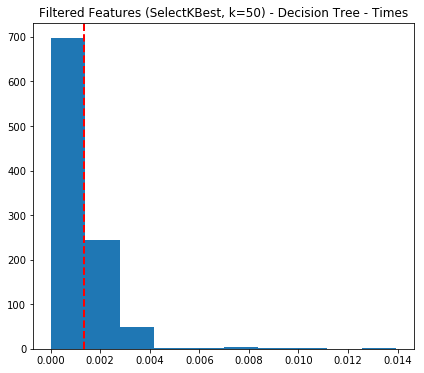

In [69]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (SelectKBest, k=50) - Decision Tree - Times")
plt.show()
all_times.update({"Filtered Features (SelectKBest, k=50) - Decision Tree - Times" : mean(times)})

In [70]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered_3, y, test_size=.4)
    cl7 = DecisionTreeClassifier()
    cl7.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl7.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl7.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.956819965192
0.953296875


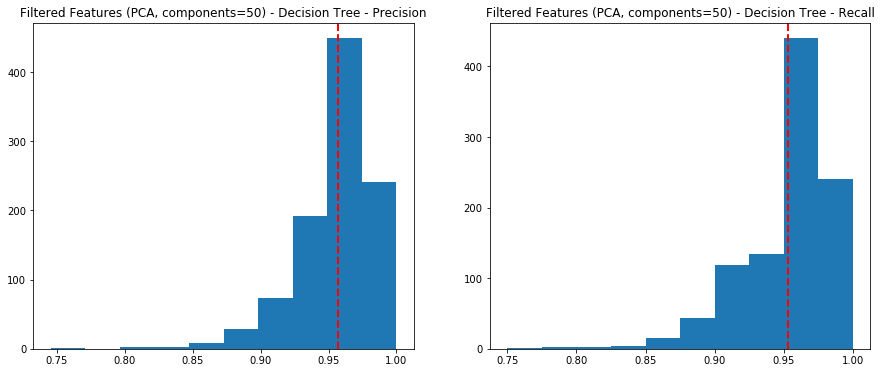

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (PCA, components=50) - Decision Tree - Precision")
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (PCA, components=50) - Decision Tree - Recall")
plt.show()

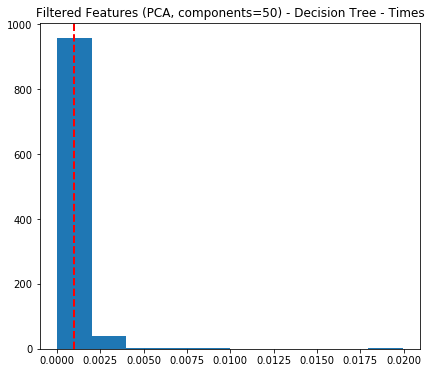

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features (PCA, components=50) - Decision Tree - Times")
plt.show()
all_times.update({"Filtered Features (PCA, components=50) - Decision Tree - Times" : mean(times)})

<h1><a id="Results-b"></a>B. K Nearest Neighbors</h1>

In [46]:
labels = ['Normal', 'Dropping', 'Duplication', 'Tamper']
matrix = np.zeros((4,4))

for i in range(1000):
    X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X_filtered, y, test_size=.4)
    cl10 = KNeighborsClassifier(n_neighbors=2)
    cl10.fit(X_filtered_train, y_train)
    predictions = list(cl10.predict(X_filtered_test))
    y_test = list(y_test)
    for i in range(len(y_test)):
        matrix[labels.index(y_test[i])][labels.index(predictions[i])] += 1
    
matrix

array([[ 16080.,      0.,      0.,      0.],
       [   780.,  14923.,      0.,    334.],
       [     0.,      0.,  15940.,      0.],
       [     0.,    407.,      0.,  15536.]])

In [52]:
# matrix_proportions = matrix/matrix
matrix_data = matrix/matrix.sum(axis=1)

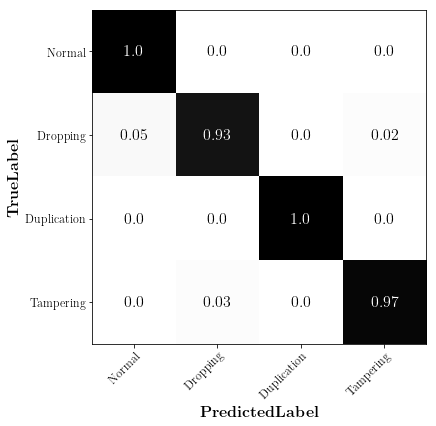

In [57]:
latexify()
labels = ['Normal', 'Dropping', 'Duplication', 'Tampering']

fig, ax = plt.subplots()
im = ax.imshow(matrix_data, cmap='Greys')

# We want to show all ticks...
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        if matrix_data[i][j] < 0.7 : c="k"
        else: c="w"
        text = ax.text(j, i, round(matrix_data[i, j], 2),
                       ha="center", va="center", color=c, fontsize=16)

ax.set_xlabel(r'$\bf{Predicted Label}$', fontsize=16)
ax.set_ylabel(r'$\bf{True Label}$', fontsize=16)
fig.set_size_inches(6, 6)

plt.tight_layout()
plt.savefig("confusionmatrix-singlelabel.jpg", dpi=300)
plt.show()

In [53]:
precision_scores = np.array([0., 0., 0., 0.])
recall_scores = np.array([0., 0., 0., 0.])
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl10 = KNeighborsClassifier(n_neighbors=2)
    cl10.fit(X_filtered_train, y_train)
    precision_scores += precision_score(y_test, cl10.predict(X_filtered_test), average=None)
    recall_scores += recall_score(y_test, cl10.predict(X_filtered_test), average=None)
print(precision_scores/1000)
print(recall_scores/1000)

[ 0.96763483  1.          0.95518437  0.98163561]
[ 0.93369004  1.          1.          0.9692872 ]


In [52]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl10 = KNeighborsClassifier(n_neighbors=2)
    cl10.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl10.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl10.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.977016300832
0.97534375


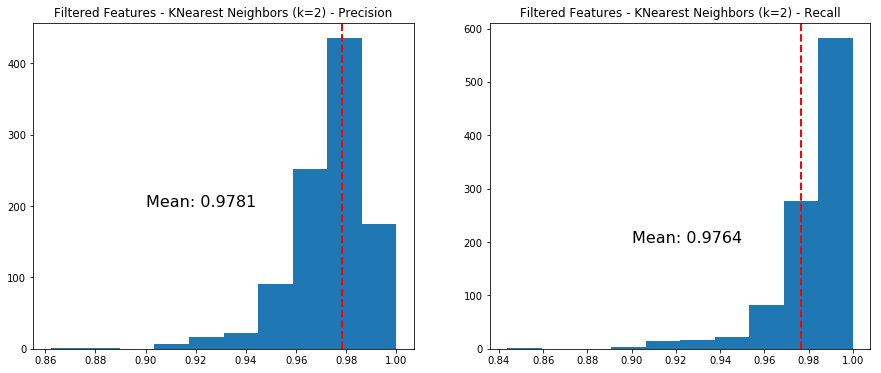

In [74]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - KNearest Neighbors (k=2) - Precision")
plt.annotate('Mean: '+str(round(precision_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - KNearest Neighbors (k=2) - Recall")
plt.annotate('Mean: '+str(round(recall_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.show()

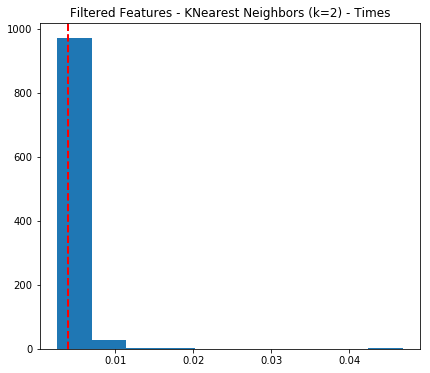

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - KNearest Neighbors (k=2) - Times")
plt.show()
all_times.update({"Filtered Features - KNearest Neighbors (k=2) - Times" : mean(times)})

<h1><a id="Results-c"></a>C. Random Forests</h1>

In [76]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl11 = RandomForestClassifier(n_estimators=18, max_depth=None,
                                  min_samples_split=2)
    cl11.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl11.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)   
    recall_scores.append(recall_score(y_test, cl11.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.974179438995
0.972359375


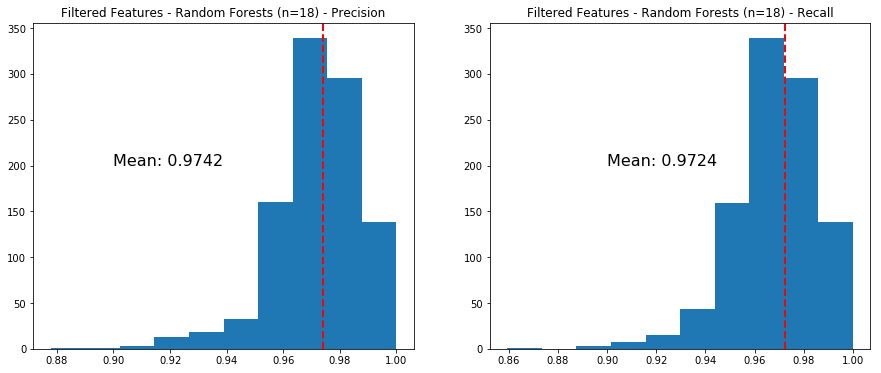

In [77]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Random Forests (n=18) - Precision")
plt.annotate('Mean: '+str(round(precision_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Random Forests (n=18) - Recall")
plt.annotate('Mean: '+str(round(recall_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.show()

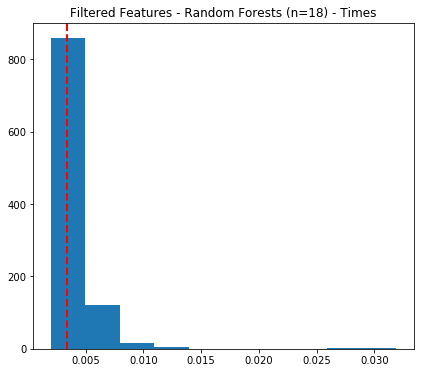

In [78]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Random Forests (n=18) - Times")
plt.show()
all_times.update({"Filtered Features - Random Forests (n=18) - Times" : mean(times)})

<h1><a id="Results-d"></a>D. K Nearest Neighbors + Random Forests Voting</h1>

In [79]:
precision_scores = np.array([0., 0., 0., 0.])
recall_scores = np.array([0., 0., 0., 0.])
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl10 = KNeighborsClassifier(n_neighbors=2)
    cl11 = RandomForestClassifier(n_estimators=18, max_depth=None,
                                  min_samples_split=2)
    cl12 = VotingClassifier(estimators=[('lr', cl10), ('rf', cl11)],
                            voting='soft')
    cl12.fit(X_filtered_train, y_train)
    precision_scores += precision_score(y_test, cl12.predict(X_filtered_test), average=None)
    recall_scores += recall_score(y_test, cl12.predict(X_filtered_test), average=None)
print(precision_scores/1000)
print(recall_scores/1000)

[ 0.97142998  1.          0.95239274  0.96878119]
[ 0.91948232  1.          1.          0.97340926]


In [80]:
precision_scores = []
recall_scores = []
times = []
for i in range(1000):
    X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)
    cl10 = KNeighborsClassifier(n_neighbors=2)
    cl11 = RandomForestClassifier(n_estimators=18, max_depth=None,
                                  min_samples_split=2)
    cl12 = VotingClassifier(estimators=[('lr', cl10), ('rf', cl11)],
                            voting='soft')
    cl12.fit(X_filtered_train, y_train)
    start = time.time()
    precision_scores.append(precision_score(y_test, cl12.predict(X_filtered_test), average="weighted"))
    end = time.time()
    times.append(end-start)
    recall_scores.append(recall_score(y_test, cl12.predict(X_filtered_test), average="weighted"))
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
print(precision_scores.mean())
print(recall_scores.mean())

0.974767083334
0.9726875


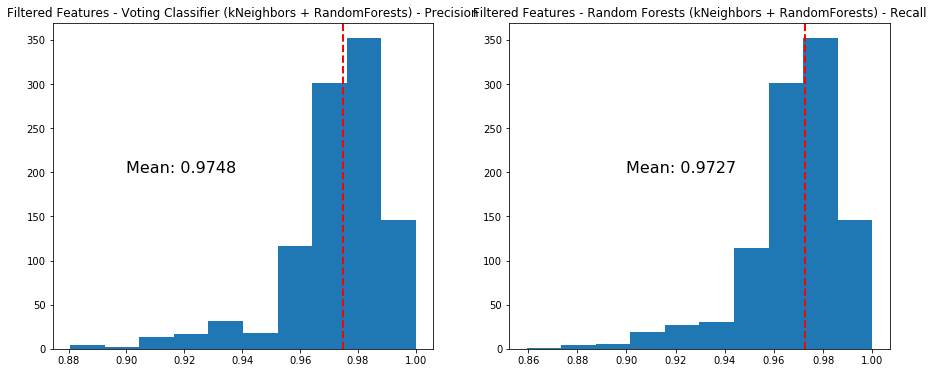

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(precision_scores)
plt.axvline(precision_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Voting Classifier (kNeighbors + RandomForests) - Precision")
plt.annotate('Mean: '+str(round(precision_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.subplot(1, 2, 2)
plt.hist(recall_scores)
plt.axvline(recall_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Random Forests (kNeighbors + RandomForests) - Recall")
plt.annotate('Mean: '+str(round(recall_scores.mean(), 4)), xy=(0.9, 50), xytext=(0.9, 200), size=16)
plt.show()

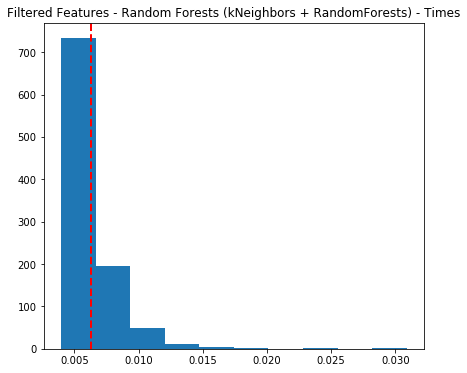

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(times)
plt.axvline(mean(times), color='r', linestyle='dashed', linewidth=2)
plt.title("Filtered Features - Random Forests (kNeighbors + RandomForests) - Times")
plt.show()
all_times.update({"Filtered Features - Random Forests (kNeighbors + RandomForests) - Times" : mean(times)})

In [83]:
time_df = pd.DataFrame.from_dict(all_times, orient='index', columns=['Times'])
print(time_df)

                                                       Times
Unfiltered Features - Decision Tree - Times         0.001847
Filtered Features - Decision Tree - Times           0.001522
Filtered Features (SelectKBest, k=50) - Decisio...  0.001341
Filtered Features (PCA, components=50) - Decisi...  0.000961
Filtered Features - KNearest Neighbors (k=2) - ...  0.003965
Filtered Features - Random Forests (n=18) - Times   0.003377
Filtered Features - Random Forests (kNeighbors ...  0.006328


<h1 class="section-header"><a id="Thresholds"></a>Thresholds</h1>

<h1><a id="Thresholds-a"></a>A. Standard Deviation</h1>

In [84]:
def StandardDeviance(packet_list):
    total = 0
    for i in range(len(packet_list)):
        total += packet_list[i]
    mean = total / len(packet_list)
    
    variance = 0
    for i in range(len(packet_list)):
        variance += ((packet_list[i] - mean)**2) / len(packet_list)
        
    standard_deviation = variance**0.5
    
    return mean, standard_deviation

In [85]:
norm_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_norm)}
dup_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_dup)}
tamper_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_tamper)}
drop_speed = {'x': np.arange(0, 600), 'y': getPacketSpeeds(df_drop)}

data = []
buttons_data = []
buttons_labels = ["Packet Speed"]
plot_data = [{"Title": "No Manipulation", "Type": "Packet Speed", "Data": norm_speed, "Color": "rgb(77, 82, 91)"}, 
             {"Title": "Duplication", "Type": "Packet Speed", "Data": dup_speed, "Color": "rgb(104, 156, 249)"}, 
             {"Title": "Tampering", "Type": "Packet Speed", "Data": tamper_speed, "Color": "rgb(249, 104, 104)"}, 
             {"Title": "Dropping", "Type": "Packet Speed", "Data": drop_speed, "Color": "rgb(104, 249, 133)"}]

for button_label in buttons_labels:
    buttons_data.append(dict(
        label = button_label,
        method = 'update',
        args = [{'visible': updateVisibility(button_label)}]
    ))
    
for plot_datum in plot_data:
    data.append(go.Scatter(
        x=plot_datum["Data"]["x"],
        y=plot_datum["Data"]["y"],
        mode='lines+markers',
        line=dict(
            color=plot_datum["Color"],
            width=1
        ),
        marker = dict(
            size = 1
        ),
        name=plot_datum["Title"],
        text=plot_datum["Title"],
        visible=(plot_datum["Type"]=='Packet Speed')
    ))
    

updatemenus = list([
    dict(active=0,
         buttons= buttons_data,
         direction = 'down',
         pad = {'r': 10, 't': 10},
         showactive = True,
         x = 0,
         xanchor = 'center',
         y = 1.3,
         yanchor = 'top'
    )
])

thresholds = [
    [StandardDeviance(norm_speed['y'])],
    [StandardDeviance(dup_speed['y'])],
    [StandardDeviance(tamper_speed['y'])],
    [StandardDeviance(drop_speed['y'])]
]



shapes = []

for array in thresholds:
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    print(array)
    temp = dict()
    temp.update({
    'type' : 'line',
    'x0' : 0,
    'y0': array[0][0] + array[0][1],
    'x1': 600,
    'y1': array[0][0] + array[0][1],
    'line': {
        'color':'rgb({},{},{})'.format(r,g,b),
        'width':1,
        'dash':'dashdot',   
        },
    })
    
    temp2 = dict()
    temp2.update({
    'type' : 'line',
    'x0' : 0,
    'y0': array[0][0] - array[0][1],
    'x1': 600,
    'y1': array[0][0] - array[0][1],
    'line': {
        'color':'rgb({},{},{})'.format(r,g,b),
        'width':1,
        'dash':'dashdot',   
        },
    })
    
    shapes.append(temp)
    shapes.append(temp2)

    
    

layout = dict(
    title='Packet Monitoring',
    updatemenus = updatemenus,
    xaxis=dict(
        title='Time (seconds)',
        rangeslider=dict(),
        autorange=True
    ),
    shapes=shapes
)


fig = dict(data=data, layout=layout)
iplot(fig)

[(292.15, 5.896679856778165)]
[(1683.1016666666667, 261.6572146859746)]
[(7.206666666666667, 30.658342348462895)]
[(50.03, 84.61874752874412)]


<h1><a id="Thresholds-b"></a>B. Distribution Functions</h1>

In [86]:
def ZScore(packet_list):
    z_scores = []
    mean, standard_deviation = StandardDeviance(packet_list)
    for i in range(len(packet_list)):
        z_scores.append((packet_list[i]-mean) / standard_deviation)
    return z_scores 

In [87]:
distribution_data = [{'data':norm_speed['y'],
                     'title':"Normal Packets"},
                     {'data':dup_speed['y'],
                    'title':"Duplicated Packets"},
                     {'data':tamper_speed['y'],
                    'title':"Tampered Packets"},
                     {'data':drop_speed['y'],
                    'title':"Dropped Packets"}]

for each in distribution_data:
    z_scores = ZScore(each["data"])

    trace = go.Histogram(x=z_scores, xbins=dict(start=np.min(z_scores), size=0.25, end=np.max(z_scores)),
                       marker=dict(color='rgb(0, 0, 100)'))

    layout = go.Layout(
        title="{} Frequency Counts".format(each["title"])
    )

    fig = go.Figure(data=go.Data([trace]), layout=layout)
    iplot(fig, filename='{}-freq-counts'.format(each["title"]))

<h1 class="section-header"><a id="Classifiers-Multilabel"></a>Classifiers (Multilabel)</h1>

<h1><a id="Classifiers-Multilabel-a"></a>A. Feature Extraction</h1>

<h2><a id="Classifiers-Multilabel-a-i"></a>i. tsfresh</h2>

In [13]:
# y_value: [Tamper, Duplication, Dropping]

dataframes = [{'data':df_norm, 'y_value':[0, 0, 0]}, 
              {'data':df_tamper, 'y_value':[1, 0, 0]}, 
              {'data':df_dup, 'y_value':[0, 1, 0]}, 
              {'data':df_drop, 'y_value':[0, 0, 1]}, 
              {'data':df_dup_drop, 'y_value':[0, 1, 1]}, 
              {'data':df_dup_tamper, 'y_value':[1, 1, 0]},
              {'data':df_drop_tamper, 'y_value':[1, 0, 1]},
              {'data':df_drop_dup_tamper, 'y_value':[1, 1, 1]}]
y_store = []
df_store = []
sample_id = 0
for df_i in range(len(dataframes)):
    y_val = dataframes[df_i]['y_value']
    for chunk in np.split(np.array(getPacketSpeeds(dataframes[df_i]['data'])), 40):
        y_store.append(y_val)
        for chunk_i in range(len(chunk)):
            df_store.append({'id':sample_id, 'time':chunk_i, 'val':chunk[chunk_i]})
        sample_id += 1

df = pd.DataFrame(df_store)
y = np.array(y_store)

In [14]:
df

,id,time,val
0,0,0,291
1,0,1,284
2,0,2,289
3,0,3,275
4,0,4,280
5,0,5,283
6,0,6,267
7,0,7,275
8,0,8,278
9,0,9,274


In [15]:
y

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [16]:
y_str = pd.Series([(str(l[0])+str(l[1])+str(l[2])) for l in y])
y_str

0      000
1      000
2      000
3      000
4      000
5      000
6      000
7      000
8      000
9      000
10     000
11     000
12     000
13     000
14     000
15     000
16     000
17     000
18     000
19     000
20     000
21     000
22     000
23     000
24     000
25     000
26     000
27     000
28     000
29     000
      ... 
290    111
291    111
292    111
293    111
294    111
295    111
296    111
297    111
298    111
299    111
300    111
301    111
302    111
303    111
304    111
305    111
306    111
307    111
308    111
309    111
310    111
311    111
312    111
313    111
314    111
315    111
316    111
317    111
318    111
319    111
Length: 320, dtype: object

In [17]:
extraction_settings = ComprehensiveFCParameters()

In [18]:
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  3.23s/it]


In [19]:
X.head()

variable,val__abs_energy,val__absolute_sum_of_changes,"val__agg_autocorrelation__f_agg_""mean""__maxlag_40","val__agg_autocorrelation__f_agg_""median""__maxlag_40","val__agg_autocorrelation__f_agg_""var""__maxlag_40","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","val__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","val__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,val__symmetry_looking__r_0.9,val__symmetry_looking__r_0.9500000000000001,val__time_reversal_asymmetry_statistic__lag_1,val__time_reversal_asymmetry_statistic__lag_2,val__time_reversal_asymmetry_statistic__lag_3,val__value_count__value_-1,val__value_count__value_0,val__value_count__value_1,val__variance,val__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,1164282.0,84.0,-0.318277,-0.084787,0.458073,291.0,-1.0,-10.0,0.0,0.0,...,1.0,1.0,-327310.538462,-4.920471e+05,-8.003561e+05,0.0,0.0,0.0,37.982222,1.0
1,1237951.0,139.0,-0.360882,-0.189682,0.396928,295.0,1.0,6.0,0.0,0.0,...,1.0,1.0,481305.307692,1.094408e+06,1.451703e+06,0.0,0.0,0.0,84.515556,1.0
2,1289634.0,61.0,-0.067411,-0.174145,0.118556,299.0,-1.0,-3.0,0.0,0.0,...,1.0,1.0,-106346.230769,-6.222636e+04,-9.548111e+04,0.0,0.0,0.0,9.360000,1.0
3,1285611.0,65.0,-0.107310,-0.109689,0.281267,300.0,-1.0,-2.0,0.0,0.0,...,1.0,1.0,-65854.923077,-1.725083e+05,-3.579941e+05,0.0,0.0,0.0,14.595556,1.0
4,1284094.0,114.0,0.000876,0.012714,0.255850,301.0,-1.0,-5.0,0.0,0.0,...,1.0,1.0,-27088.615385,-1.081755e+05,1.350256e+04,0.0,0.0,0.0,30.515556,1.0


<h1><a id="Classifiers-Multilabel-b"></a>B. Feature Filtering</h1>

<h2><a id="Classifiers-Multilabel-b-i"></a>i. tsfresh</h2>

In [20]:
X_filtered = extract_relevant_features(df, y_str, 
                                       column_id='id', column_sort='time',
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  3.57s/it]


In [21]:
X_filtered.head()

variable,"val__fft_aggregated__aggtype_""variance""","val__fft_aggregated__aggtype_""centroid""",val__sum_of_reoccurring_values,val__sum_of_reoccurring_data_points,"val__fft_aggregated__aggtype_""skew""","val__fft_aggregated__aggtype_""kurtosis""",val__binned_entropy__max_bins_10,val__minimum,val__cid_ce__normalize_True,val__partial_autocorrelation__lag_1,...,"val__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.4","val__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","val__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""stderr""","val__fft_coefficient__coeff_2__attr_""abs""","val__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0","val__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.4","val__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","val__fft_coefficient__coeff_4__attr_""abs""",val__friedrich_coefficients__m_3__r_30__coeff_0,"val__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
0,0.671843,0.138928,552.0,1104.0,6.510976,45.365282,2.083766,267.0,4.401987,0.179875,...,4.75,2.187500,3.025315,20.009578,0.0,24.187500,0.0,31.464841,54.29592,0.25
1,0.918603,0.189438,569.0,1138.0,5.584250,33.551005,2.153532,272.0,4.533479,0.199497,...,8.50,12.916667,8.336938,51.767483,3.0,84.472222,0.0,23.764165,54.29592,0.00
2,0.405701,0.077271,1174.0,2642.0,1.021008,6.028038,2.026230,288.0,6.244656,-0.323871,...,3.25,3.687500,1.293265,10.436189,0.0,6.687500,0.0,11.214867,54.29592,0.25
3,0.502010,0.097991,882.0,2351.0,7.741466,63.330613,1.951848,285.0,6.008900,-0.347486,...,1.00,0.000000,4.664990,5.446129,0.0,1.000000,1.0,25.048507,54.29592,0.00
4,0.699398,0.136813,881.0,2352.0,6.489552,44.494378,1.748971,283.0,6.536995,-0.534039,...,2.00,8.000000,8.198374,15.456904,0.0,8.000000,0.0,18.345876,54.29592,0.00


In [22]:
relevant_features = list(X_filtered.columns)

<h1><a id="Classifiers-Multilabel-c"></a>C. Machine Learning Models</h1>

In [98]:
def multilabel_score(X, Y):
    """ 
    Returns scoring metrics for multilabel classification results
    Returns dictionary with the following information
    All Correct: The proportion of samples where all the labels were identified correctly
    Average Accuracy: The proportion of all labels that were correctly identified
    Normal vs. Threat Accuracy: The proportion of labels where Normal vs. Threat was correctly distinguished   
    
    Parameters
    X: ndarray of predictions
    Y: ndarray of answers
    """
    if (X.shape != Y.shape):
        return "ERROR: X and Y do not have the same dimensions"
    
    class_accuracies = {}
    class_totals = {}
    
    length = X.shape[0]
    width = X.shape[1]
    total_correct = 0
    all_correct = 0
    normal_threat_correct = 0
    for length_i in range(length):
        class_code = str(Y[length_i][0])+str(Y[length_i][1])+str(Y[length_i][2])
        class_code_x = str(X[length_i][0])+str(X[length_i][1])+str(X[length_i][2])
        if (class_code not in class_accuracies):
            class_accuracies[class_code] = {}
            class_totals[class_code] = 0
        if (class_code_x not in class_accuracies[class_code]):
            class_accuracies[class_code][class_code_x] = 0
        class_totals[class_code] += 1
        class_accuracies[class_code][class_code_x] += 1
        if (np.array_equal(X[length_i], Y[length_i])):
            all_correct += 1
        total_correct += np.absolute(X[length_i] == Y[length_i]).sum()
        if ((np.sum(X[length_i]) == 0 and np.sum(Y[length_i]) == 0) or 
            (np.sum(X[length_i]) != 0 and np.sum(Y[length_i]) != 0)):
            normal_threat_correct += 1
    class_predict_counts = copy.deepcopy(class_accuracies)
    for class_code in class_accuracies.keys():
        for class_code_x in class_accuracies[class_code].keys():
            class_accuracies[class_code][class_code_x] = class_accuracies[class_code][class_code_x]/class_totals[class_code]
    return {'All Correct': all_correct/length, 
            'Average Accuracy': total_correct/(length*width), 
            'Normal vs. Threat Accuracy': normal_threat_correct/length, 
            'Class Accuracy': class_accuracies,
            'Class Predict Counts': class_predict_counts, 
            'Class Totals': class_totals}

<h2><a id="Classifiers-Multilabel-c-i"></a>i. Classifier Chain</h2>

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
multilabel_score(predictions.toarray(), y_test)

{'All Correct': 0.1875,
 'Average Accuracy': 0.578125,
 'Normal vs. Threat Accuracy': 0.8515625,
 'Class Accuracy': {'110': {'0.01.00.0': 0.4375,
   '1.00.01.0': 0.25,
   '1.01.00.0': 0.3125},
  '101': {'1.01.00.0': 0.4,
   '1.00.01.0': 0.3333333333333333,
   '0.01.00.0': 0.2,
   '0.01.01.0': 0.06666666666666667},
  '011': {'0.01.00.0': 0.9333333333333333, '0.01.01.0': 0.06666666666666667},
  '111': {'1.00.01.0': 0.5, '0.01.00.0': 0.5},
  '001': {'1.01.00.0': 0.05555555555555555,
   '0.01.00.0': 0.8333333333333334,
   '0.01.01.0': 0.05555555555555555,
   '0.00.00.0': 0.05555555555555555},
  '100': {'0.01.00.0': 0.8888888888888888,
   '1.01.00.0': 0.05555555555555555,
   '0.00.00.0': 0.05555555555555555},
  '000': {'0.01.00.0': 1.0},
  '010': {'0.01.00.0': 1.0}},
 'Class Predict Counts': {'110': {'0.01.00.0': 7,
   '1.00.01.0': 4,
   '1.01.00.0': 5},
  '101': {'1.01.00.0': 6, '1.00.01.0': 5, '0.01.00.0': 3, '0.01.01.0': 1},
  '011': {'0.01.00.0': 14, '0.01.01.0': 1},
  '111': {'1.00.01.

<h2><a id="Classifiers-Multilabel-c-ii"></a>ii. Label Powerset</h2>

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
multilabel_score(predictions.toarray(), y_test)

{'All Correct': 0.296875,
 'Average Accuracy': 0.55208333333333337,
 'Normal vs. Threat Accuracy': 0.5,
 'Class Accuracy': {'001': {'000': 0.9090909090909091,
   '001': 0.09090909090909091},
  '101': {'000': 0.75, '001': 0.25},
  '110': {'000': 0.45, '001': 0.35, '101': 0.2},
  '010': {'010': 1.0},
  '111': {'001': 0.3181818181818182,
   '000': 0.5454545454545454,
   '011': 0.045454545454545456,
   '101': 0.09090909090909091},
  '011': {'000': 0.75, '011': 0.1875, '001': 0.0625},
  '000': {'000': 1.0},
  '100': {'000': 1.0}},
 'Class Predict Counts': {'001': {'000': 10, '001': 1},
  '101': {'000': 12, '001': 4},
  '110': {'000': 9, '001': 7, '101': 4},
  '010': {'010': 14},
  '111': {'001': 7, '000': 12, '011': 1, '101': 2},
  '011': {'000': 12, '011': 3, '001': 1},
  '000': {'000': 20},
  '100': {'000': 9}},
 'Class Totals': {'001': 11,
  '101': 16,
  '110': 20,
  '010': 14,
  '111': 22,
  '011': 16,
  '000': 20,
  '100': 9}}

<h2><a id="Classifiers-Multilabel-c-iii"></a>iii. Multilabel K Nearest Neighbors</h2>

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)

parameters = {'k': range(1,10), 's': list(np.arange(0, 1.01, 0.05))}
score = 'f1_macro'

clf = GridSearchCV(MLkNN(), parameters, scoring=score)
clf.fit(X_filtered, y)

print (clf.best_params_, clf.best_score_)

{'k': 3, 's': 0.0} 0.662876907507


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)

classifier = MLkNN(k=3, s=0.5)

# train
classifier.fit(X_train, y_train)

# predict
start = time.time()
predictions = classifier.predict(X_test)
end = time.time()
print(end-start)
print(len(X_test))
multilabel_score_info = multilabel_score(predictions.toarray(), y_test)
accuracies = multilabel_score_info['Class Accuracy']
counts = multilabel_score_info['Class Predict Counts']
totals = multilabel_score_info['Class Totals']
print('All Correct:', multilabel_score_info['All Correct'])
print('Average Accuracy:', multilabel_score_info['Average Accuracy'])
print('Normal vs. Threat Accuracy:', multilabel_score_info['Normal vs. Threat Accuracy'])

0.16853809356689453
128


NameError: name 'multilabel_score' is not defined

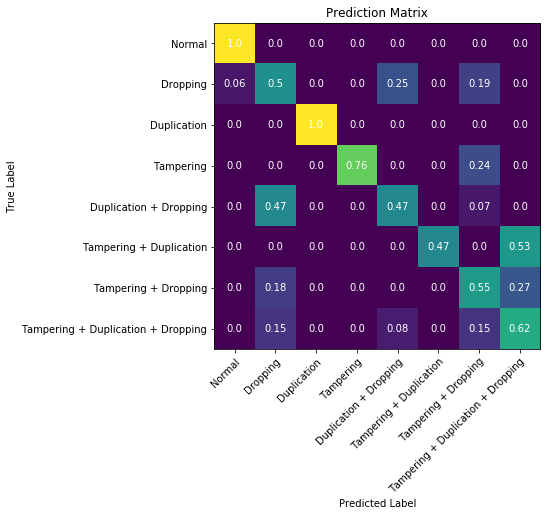

In [103]:
codes = ['000','001','010','100','011','110','101','111']

# codes: [Tamper, Duplication, Dropping]
labels = ['Normal', 'Dropping', 'Duplication', 'Tampering', 
          'Duplication + Dropping', 'Tampering + Duplication', 
          'Tampering + Dropping', 'Tampering + Duplication + Dropping']

matrix_data = np.zeros((len(labels), len(labels)))
for i in range(len(codes)):
    for j in range(len(codes)):
        if codes[j] in accuracies[codes[i]]:
            matrix_data[i][j] = accuracies[codes[i]][codes[j]]

fig, ax = plt.subplots()
im = ax.imshow(matrix_data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(matrix_data[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.set_size_inches(6, 6)
ax.set_title("Prediction Matrix")
plt.show()

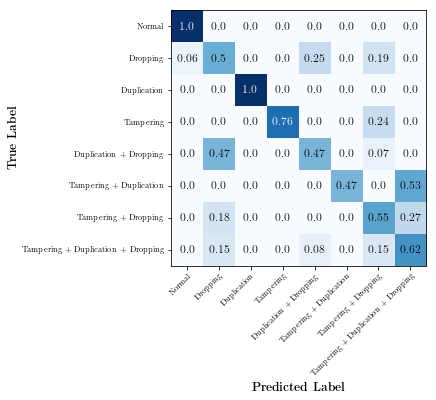

In [89]:
latexify()
labels = ['Normal', 'Dropping', 'Duplication', 'Tampering', 
          'Duplication + Dropping', 'Tampering + Duplication', 
          'Tampering + Dropping', 'Tampering + Duplication + Dropping']

matrix_data = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                        [0.06, 0.5, 0.0, 0.0, 0.25, 0.0, 0.19, 0.0], 
                        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
                        [0.0, 0.0, 0.0, 0.76, 0.0, 0.0, 0.24, 0.0], 
                        [0.0, 0.47, 0.0, 0.0, 0.47, 0.0, 0.07, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.47, 0.0, 0.53],
                        [0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.55, 0.27],
                        [0.0, 0.15, 0.0, 0.0, 0.08, 0.0, 0.15, 0.62]])

fig, ax = plt.subplots()
im = ax.imshow(matrix_data, cmap='Blues')

# We want to show all ticks...
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        if matrix_data[i][j] < 0.7 : c="k"
        else: c="w"
        text = ax.text(j, i, round(matrix_data[i, j], 2),
                       ha="center", va="center", color=c, fontsize=12)

ax.set_xlabel(r'$\bf{Predicted\ Label}$', fontsize=12)
ax.set_ylabel(r'$\bf{True\ Label}$', fontsize=12)
fig.set_size_inches(6, 6)
# ax.set_title("Confusion Matrix for Multilabel KNN Classifier")
plt.tight_layout()
plt.savefig("confusionmatrixcolored.jpg", dpi=300)
plt.show()

<h1 class="section-header"><a id="Results-Multilabel"></a>Results (Multilabel)</h1>

<h1><a id="Results-Multilabel-a"></a>A. Multilabel K Nearest Neighbors</h1>

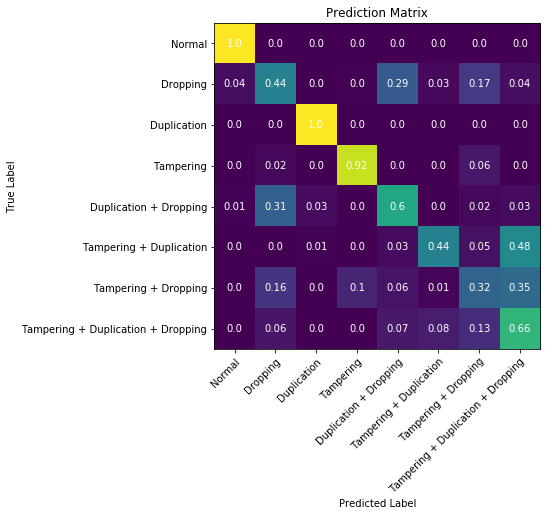

In [104]:
codes = ['000','001','010','100','011','110','101','111']

# codes: [Tamper, Duplication, Dropping]
labels = ['Normal', 'Dropping', 'Duplication', 'Tampering', 
          'Duplication + Dropping', 'Tampering + Duplication', 
          'Tampering + Dropping', 'Tampering + Duplication + Dropping']

total_matrix_data = np.zeros((len(labels), len(labels)))
total_counts_array = np.zeros((1, len(codes)))
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
    classifier = MLkNN(k=3, s=0.5)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    multilabel_score_info = multilabel_score(predictions.toarray(), y_test)
    accuracies = multilabel_score_info['Class Accuracy']
    counts = multilabel_score_info['Class Predict Counts']
    totals = multilabel_score_info['Class Totals']

    matrix_data = np.zeros((len(labels), len(labels)))
    counts_array = np.zeros((1, len(codes)))
    for i in range(len(codes)):
        counts_array[0][i] = totals[codes[i]]
        for j in range(len(codes)):
            if codes[j] in counts[codes[i]]:
                matrix_data[i][j] = counts[codes[i]][codes[j]]
    total_matrix_data += matrix_data
    total_counts_array += counts_array
            
matrix_data = np.divide(total_matrix_data, total_counts_array.transpose())

fig, ax = plt.subplots()
im = ax.imshow(matrix_data)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(matrix_data[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.set_size_inches(6, 6)
ax.set_title("Prediction Matrix")
plt.show()

In [105]:
all_correct_scores = []
average_accuracy_scores = []
normal_threat_accuracy_scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
    classifier = MLkNN(k=3, s=0.5)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    results = multilabel_score(predictions.toarray(), y_test)
    all_correct_scores.append(results['All Correct'])
    average_accuracy_scores.append(results['Average Accuracy'])
    normal_threat_accuracy_scores.append(results['Normal vs. Threat Accuracy'])
all_correct_scores = np.array(all_correct_scores)
average_accuracy_scores = np.array(average_accuracy_scores)
normal_threat_accuracy_scores = np.array(normal_threat_accuracy_scores)

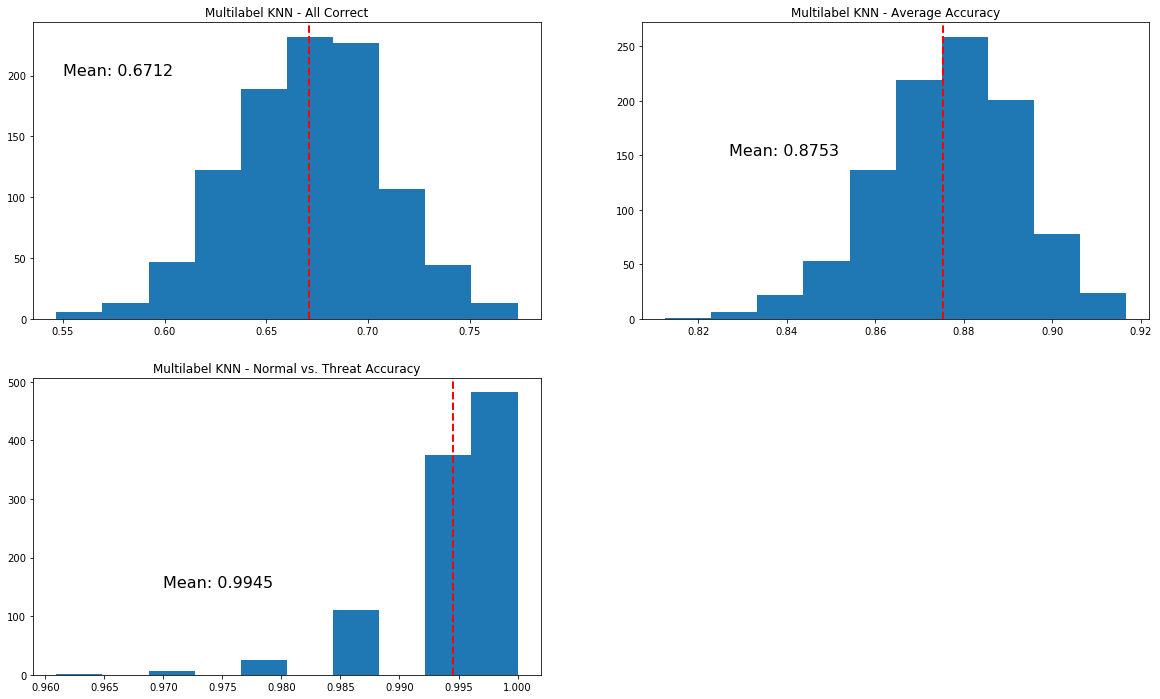

In [106]:
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 1)
plt.hist(all_correct_scores)
plt.axvline(all_correct_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(all_correct_scores.mean(), 4)), xy=(0.55, 50), xytext=(0.55, 200), size=16)
plt.title("Multilabel KNN - All Correct")
plt.subplot(2, 2, 2)
plt.hist(average_accuracy_scores)
plt.axvline(average_accuracy_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(average_accuracy_scores.mean(), 4)), xy=(0.827, 50), xytext=(0.827, 150), size=16)
plt.title("Multilabel KNN - Average Accuracy")
plt.subplot(2, 2, 3)
plt.hist(normal_threat_accuracy_scores)
plt.axvline(normal_threat_accuracy_scores.mean(), color='r', linestyle='dashed', linewidth=2)
plt.annotate('Mean: '+str(round(normal_threat_accuracy_scores.mean(), 4)), xy=(0.97, 150), xytext=(0.97, 150), size=16)
plt.title("Multilabel KNN - Normal vs. Threat Accuracy")
plt.show()

In [107]:
d = {'id':np.zeros(15), 'time': np.arange(0,15), 'val':getPacketSpeeds(df_drop_transition, 300)[30:45]}

snip = pd.DataFrame.from_dict(d,orient='index').transpose()
snip_x = extract_features(snip, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute, show_warnings=False)[relevant_features]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
classifier = MLkNN(k=3, s=0.5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(snip_x)
predictions.toarray()

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.06s/it]


array([[1, 0, 1]], dtype=int64)

# Transition Detection Time - Single Label KNN

In [84]:
# codes: [Tamper, Duplication, Dropping]
codes_to_labels = {'000':'Normal', 
                   '001':'Dropping',
                   '010':'Duplication',
                   '100':'Tampering',
                   '011':'Duplication + Dropping',
                   '110':'Tampering + Duplication',
                   '101':'Tampering + Dropping',
                   '111':'Tampering + Duplication + Dropping'}
time_splits = [(15, 45), (75, 105), (135, 165), (195, 225), (255, 285)]
time_frame = 15
detection_results = []

for split in time_splits:
    for time in range(split[0], split[1]-15):
        d = {'id':np.zeros(15), 'time': np.arange(0,15), 'val': getPacketSpeeds(df_tamper_transition, 300)[time:time+15]}
        snip = pd.DataFrame.from_dict(d,orient='index').transpose()
        snip_x = extract_features(snip, column_id='id', column_sort='time',
                             default_fc_parameters=extraction_settings,
                             impute_function=impute, show_warnings=False)[list(X_filtered.columns)]
        X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
        classifier = KNeighborsClassifier(n_neighbors=2)
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(snip_x)
        label = predictions[0]
        detection_results.append({'time': str(time) + '-' + str(time+15), 'prediction': label})


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.12s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.65s/it]

In [85]:
detection_results
# Dropping:
# 5, 4, 3, 6, 4 
# ~ 4.4 seconds

# Duplication:
# 2, 3, 1, 3, 3
# ~ 2.4 seconds

# Tampering:
# 10, 1, 1, 1, 1
# 2.8 seconds

[{'time': '15-30', 'prediction': 'Normal'},
 {'time': '16-31', 'prediction': 'Normal'},
 {'time': '17-32', 'prediction': 'Normal'},
 {'time': '18-33', 'prediction': 'Normal'},
 {'time': '19-34', 'prediction': 'Normal'},
 {'time': '20-35', 'prediction': 'Normal'},
 {'time': '21-36', 'prediction': 'Normal'},
 {'time': '22-37', 'prediction': 'Normal'},
 {'time': '23-38', 'prediction': 'Normal'},
 {'time': '24-39', 'prediction': 'Normal'},
 {'time': '25-40', 'prediction': 'Dropping'},
 {'time': '26-41', 'prediction': 'Normal'},
 {'time': '27-42', 'prediction': 'Normal'},
 {'time': '28-43', 'prediction': 'Normal'},
 {'time': '29-44', 'prediction': 'Dropping'},
 {'time': '75-90', 'prediction': 'Tamper'},
 {'time': '76-91', 'prediction': 'Tamper'},
 {'time': '77-92', 'prediction': 'Tamper'},
 {'time': '78-93', 'prediction': 'Tamper'},
 {'time': '79-94', 'prediction': 'Tamper'},
 {'time': '80-95', 'prediction': 'Tamper'},
 {'time': '81-96', 'prediction': 'Tamper'},
 {'time': '82-97', 'predicti

# Transition Detection Time - Multi Label KNN

In [85]:
# codes: [Tamper, Duplication, Dropping]
codes_to_labels = {'000':'Normal', 
                   '001':'Dropping',
                   '010':'Duplication',
                   '100':'Tampering',
                   '011':'Duplication + Dropping',
                   '110':'Tampering + Duplication',
                   '101':'Tampering + Dropping',
                   '111':'Tampering + Duplication + Dropping'}
time_splits = [(15, 45), (75, 105), (135, 165), (195, 225), (255, 285)]
time_frame = 15
detection_results = []

for split in time_splits:
    for time in range(split[0], split[1]-15):
        d = {'id':np.zeros(15), 'time': np.arange(0,15), 'val': getPacketSpeeds(df_drop_dup_tamper_transition, 300)[time:time+15]}
        snip = pd.DataFrame.from_dict(d,orient='index').transpose()
        snip_x = extract_features(snip, column_id='id', column_sort='time',
                             default_fc_parameters=extraction_settings,
                             impute_function=impute, show_warnings=False)[list(X_filtered.columns)]
        X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.4)
        classifier = MLkNN(k=3, s=0.5)
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(snip_x)
        matrix = predictions.toarray()
        code = str(matrix[0][0]) + str(matrix[0][1]) + str(matrix[0][2])
        label = codes_to_labels[code]
        detection_results.append({'time': str(time) + '-' + str(time+15), 'prediction': label})

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.40s/it]


In [86]:
detection_results
# Dropping:
# 3, 5, 4, 4, 4
# 4.0 seconds

# Duplication:
# 1, 4, 1, 2, 2
# 2.0 seconds

# Tampering:
# 11, 1, 1, 1, 1
# 2.8 seconds

# Drop + Dup:
# 1, 1, 3, 1, 2
# 2.6 seconds

# Drop + Tamper
# 6, 6, 4, 1, 1
# 3.6 seconds

# Dup + Tamper
# 1, 2, 1, 1, 1
# 1.2 seconds

# Drop + Dup + Tamper
# 5, 3, 3, 6, 1
# 3.6 seconds

[{'time': '15-30', 'prediction': 'Normal'},
 {'time': '16-31', 'prediction': 'Normal'},
 {'time': '17-32', 'prediction': 'Normal'},
 {'time': '18-33', 'prediction': 'Normal'},
 {'time': '19-34', 'prediction': 'Normal'},
 {'time': '20-35', 'prediction': 'Dropping'},
 {'time': '21-36', 'prediction': 'Dropping'},
 {'time': '22-37', 'prediction': 'Dropping'},
 {'time': '23-38', 'prediction': 'Dropping'},
 {'time': '24-39', 'prediction': 'Normal'},
 {'time': '25-40', 'prediction': 'Normal'},
 {'time': '26-41', 'prediction': 'Normal'},
 {'time': '27-42', 'prediction': 'Dropping'},
 {'time': '28-43', 'prediction': 'Normal'},
 {'time': '29-44', 'prediction': 'Normal'},
 {'time': '75-90', 'prediction': 'Normal'},
 {'time': '76-91', 'prediction': 'Normal'},
 {'time': '77-92', 'prediction': 'Normal'},
 {'time': '78-93', 'prediction': 'Dropping'},
 {'time': '79-94', 'prediction': 'Normal'},
 {'time': '80-95', 'prediction': 'Dropping'},
 {'time': '81-96', 'prediction': 'Dropping'},
 {'time': '82-97

In [110]:
%%html
<style>
.notebook-title {
    text-align: center;
    background-color: #124391;
    padding: 30px;
    color: white;
}

.section-header {
    text-align: center;
    background-color: gray;
    padding: 30px;
    color: white;
}

.outline {
    width: 400px;
    margin: auto;
}  

</style>